## GETINNOTIZED SALES ANALYSIS AND BUSINESS INTELLIGENCE SOLUTION
### Business Understanding
##### Client Overview:
The client has collected transactional sales data for the entire year of 2019 but has yet to leverage this data effectively. They aim to derive insights from the data to identify revenue opportunities, optimize operations, and drive more sales. This project involves analyzing and visualizing the sales data to answer key business questions related to sales performance, product trends, geographic distribution, and overall operational efficiency.

##### Problem Statement
Inability to extract actionable insights from 2019 data collected.Without a structured analysis of this data, the client is missing opportunities to drive more sales, identify performance patterns, and optimize operational efficiency.

##### Project Goals:
The goal is to deliver a comprehensive business intelligence solution by analyzing sales data to provide the following insights:
 - Understand total revenue generated in 2019.
 - Identify seasonal patterns in sales.
 - Determine best- and worst-selling products.
 - Compare sales across different months and weeks.
 - Identify cities with the highest number of product deliveries.
 - Analyze revenue and quantities ordered across different product categories.
 - Present any other significant insights or trends discovered during the analysis.

##### Stakeholders
 - GetINNotized Team
 
##### Key Metrics and Success Criteria
Key Metrics include, Total revenue generated, seasonal trends,product performance,Delivery analysis and sales comparison over time.
Success Criterias include:
 - Achieve a clear and accurate calculation of total revenue, providing a benchmark for future performance.
 - Visual representation of sales trends over time, enabling the client to anticipate and respond to seasonal variations.
 - Clear identification of top and bottom performing products, leading to actionable insights on inventory and marketing  strategies
 -  Detailed reports showing sales growth or decline over different time periods, facilitating informed decision-making
 -  Identification of top delivery locations, enabling targeted marketing and improved logistics planning.
 - Comprehensive understanding of which categories drive the most sales and which may need strategic focus.

##### Data Features:

 - Orders Table: Contains order details.

  Order_ID: Unique identifier for each order.
  Product: Name of the product.
  Quantity_Ordered: Number of units ordered.
  Price_Each: Price per unit.
  Purchase_Address: Address where the product was delivered.
  Category: Category of the product.
  product_Level: High-level or basic-level classification based on price.
  Sales: Total sales amount for the order.
  State: State where the product was delivered.
  city: city where the product was delivered


##### Hypothesis Testing
  **Null Hypothesis (H0)**: There is no significant difference in average sales performance among the different months of the year.
  **Alternate Hypothesis (H1)**: There is a significant difference in average sales performance among at least one pair of months.

##### Analytical Questions:

 - How much revenue did we generate in 2019?
 - Can we identify seasonality or trends in sales?
 - Which products were our best and worst-sellers?
 - How do sales compare across months or weeks?
 - Which cities receive the most deliveries?
 - How do product categories compare in terms of revenue and quantities sold?
##### MOre Info
 - Products with unit prices above $99.99 will be classified as high-level, while products below this threshold will be categorized as basic level. This will allow us to explore how high-level vs. basic-level products contribute to revenue and sales.

 - Exporation of Potential Anomalies:Investigate any unexpected patterns, anomalies, or outliers in the data.

### Data Understanding

##### Importations

In [435]:
#Import the necessary python libraries
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import datetime
import calendar 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import f_oneway


warnings.filterwarnings('ignore')

##### Loading the datasets

In [365]:
# Import the January 2019 sales dataset
# Load data for January 2019
sales_jan_2019 = pd.read_csv("Sales_January_2019.csv")
sales_jan_2019

Order ID                   Product Quantity Ordered Price Each  \
0      141234                    iPhone                1        700   
1      141235  Lightning Charging Cable                1      14.95   
2      141236          Wired Headphones                2      11.99   
3      141237          27in FHD Monitor                1     149.99   
4      141238          Wired Headphones                1      11.99   
...       ...                       ...              ...        ...   
9718   150497              20in Monitor                1     109.99   
9719   150498          27in FHD Monitor                1     149.99   
9720   150499           ThinkPad Laptop                1     999.99   
9721   150500    AAA Batteries (4-pack)                2       2.99   
9722   150501              Google Phone                1        600   

          Order Date                       Purchase Address  
0     01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1     01/28/19 14:15       185 Maple St, Portland, OR 97035  
2     01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3     01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4     01/25/19 11:59          387 10th St, Austin, TX 73301  
...              ...                                    ...  
9718  01/26/19 19:09            95 8th St, Dallas, TX 75001  
9719  01/10/19 22:58    403 7th St, San Francisco, CA 94016  
9720  01/21/19 14:31        214 Main St, Portland, OR 97035  
9721  01/15/19 14:21      810 2nd St, Los Angeles, CA 90001  
9722  01/13/19 16:43         428 Cedar St, Boston, MA 02215  

[9723 rows x 6 columns]

In [366]:
# Import the February 2019 sales dataset
# Load data for February 2019
sales_feb_2019 = pd.read_csv(r"Sales_February_2019.csv")
sales_feb_2019

Order ID                   Product Quantity Ordered Price Each  \
0       150502                    iPhone                1        700   
1       150503     AA Batteries (4-pack)                1       3.84   
2       150504    27in 4K Gaming Monitor                1     389.99   
3       150505  Lightning Charging Cable                1      14.95   
4       150506     AA Batteries (4-pack)                2       3.84   
...        ...                       ...              ...        ...   
12031   162004  Apple Airpods Headphones                1        150   
12032   162005    AAA Batteries (4-pack)                2       2.99   
12033   162006      USB-C Charging Cable                1      11.95   
12034   162007      USB-C Charging Cable                1      11.95   
12035   162008          27in FHD Monitor                1     149.99   

           Order Date                         Purchase Address  
0      02/18/19 01:35        866 Spruce St, Portland, ME 04101  
1      02/13/19 07:24      18 13th St, San Francisco, CA 94016  
2      02/18/19 09:46       52 6th St, New York City, NY 10001  
3      02/02/19 16:47         129 Cherry St, Atlanta, GA 30301  
4      02/28/19 20:32        548 Lincoln St, Seattle, WA 98101  
...               ...                                      ...  
12031  02/12/19 22:02   227 Church St, San Francisco, CA 94016  
12032  02/04/19 20:44  417 Jefferson St, Los Angeles, CA 90001  
12033  02/24/19 06:31            498 8th St, Atlanta, GA 30301  
12034  02/24/19 19:09             715 7th St, Dallas, TX 75001  
12035  02/26/19 17:15       677 West St, Los Angeles, CA 90001  

[12036 rows x 6 columns]

In [367]:
# Import the March 2019 sales dataset
# Load data for March 2019
sales_mar_2019 = pd.read_csv("Sales_March_2019.csv")
sales_mar_2019

Order ID                     Product Quantity Ordered Price Each  \
0       162009                      iPhone                1        700   
1       162009    Lightning Charging Cable                1      14.95   
2       162009            Wired Headphones                2      11.99   
3       162010  Bose SoundSport Headphones                1      99.99   
4       162011      34in Ultrawide Monitor                1     379.99   
...        ...                         ...              ...        ...   
15221   176554    Lightning Charging Cable                1      14.95   
15222   176555            27in FHD Monitor                1     149.99   
15223   176556      AAA Batteries (4-pack)                3       2.99   
15224   176557                      iPhone                1        700   
15225   176557    Lightning Charging Cable                1      14.95   

           Order Date                           Purchase Address  
0      03/28/19 20:59            942 Church St, Austin, TX 73301  
1      03/28/19 20:59            942 Church St, Austin, TX 73301  
2      03/28/19 20:59            942 Church St, Austin, TX 73301  
3      03/17/19 05:39       261 10th St, San Francisco, CA 94016  
4      03/10/19 00:01       764 13th St, San Francisco, CA 94016  
...               ...                                        ...  
15221  03/24/19 11:14       672 12th St, San Francisco, CA 94016  
15222  03/22/19 20:27         42 4th St, San Francisco, CA 94016  
15223  03/14/19 10:29          871 7th St, Los Angeles, CA 90001  
15224  03/30/19 12:32  83 Washington St, San Francisco, CA 94016  
15225  03/30/19 12:32  83 Washington St, San Francisco, CA 94016  

[15226 rows x 6 columns]

In [368]:
# Import the April 2019 sales dataset
# Load data for April 2019
sales_apr_2019 = pd.read_csv("Sales_April_2019.csv")
sales_apr_2019

Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
18378   194090                Google Phone                1        600   
18379   194091       AA Batteries (4-pack)                1       3.84   
18380   194092      AAA Batteries (4-pack)                2       2.99   
18381   194093       AA Batteries (4-pack)                1       3.84   
18382   194094    Lightning Charging Cable                1      14.95   

           Order Date                        Purchase Address  
0      04/19/19 08:46            917 1st St, Dallas, TX 75001  
1                 NaN                                     NaN  
2      04/07/19 22:30       682 Chestnut St, Boston, MA 02215  
3      04/12/19 14:38    669 Spruce St, Los Angeles, CA 90001  
4      04/12/19 14:38    669 Spruce St, Los Angeles, CA 90001  
...               ...                                     ...  
18378  04/08/19 17:11   177 Jackson St, Los Angeles, CA 90001  
18379  04/15/19 16:02         311 Forest St, Austin, TX 73301  
18380  04/28/19 14:36  347 Sunset St, San Francisco, CA 94016  
18381  04/14/19 15:09         835 Lake St, Portland, OR 97035  
18382  04/18/19 11:08          354 North St, Boston, MA 02215  

[18383 rows x 6 columns]

In [369]:
# Import the May 2019 sales dataset
# Load data for May 2019
sales_may_2019 = pd.read_csv("Sales_May_2019.csv")
sales_may_2019

Order ID                     Product Quantity Ordered Price Each  \
0       194095            Wired Headphones                1      11.99   
1       194096       AA Batteries (4-pack)                1       3.84   
2       194097            27in FHD Monitor                1     149.99   
3       194098            Wired Headphones                1      11.99   
4       194099      AAA Batteries (4-pack)                2       2.99   
...        ...                         ...              ...        ...   
16630   209916  Bose SoundSport Headphones                1      99.99   
16631   209917            Wired Headphones                1      11.99   
16632   209918      AAA Batteries (4-pack)                2       2.99   
16633   209919        USB-C Charging Cable                1      11.95   
16634   209920             ThinkPad Laptop                1     999.99   

           Order Date                         Purchase Address  
0      05/16/19 17:14      669 2nd St, New York City, NY 10001  
1      05/19/19 14:43          844 Walnut St, Dallas, TX 75001  
2      05/24/19 11:36  164 Madison St, New York City, NY 10001  
3      05/02/19 20:40          622 Meadow St, Dallas, TX 75001  
4      05/11/19 22:55          17 Church St, Seattle, WA 98101  
...               ...                                      ...  
16630  05/08/19 19:15         235 Center St, Seattle, WA 98101  
16631  05/24/19 22:02      926 9th St, San Francisco, CA 94016  
16632  05/24/19 17:44         868 Hickory St, Boston, MA 02215  
16633  05/04/19 12:46          204 Adams St, Seattle, WA 98101  
16634  05/18/19 23:07             43 5th St, Atlanta, GA 30301  

[16635 rows x 6 columns]

In [370]:
# Import the June 2019 sales dataset
# Load data for June 2019
sales_jun_2019 = pd.read_csv("Sales_June_2019.csv")
sales_jun_2019

Order ID                     Product Quantity Ordered Price Each  \
0       209921        USB-C Charging Cable                1      11.95   
1       209922          Macbook Pro Laptop                1     1700.0   
2       209923             ThinkPad Laptop                1     999.99   
3       209924            27in FHD Monitor                1     149.99   
4       209925  Bose SoundSport Headphones                1      99.99   
...        ...                         ...              ...        ...   
13617   222905      AAA Batteries (4-pack)                1       2.99   
13618   222906            27in FHD Monitor                1     149.99   
13619   222907        USB-C Charging Cable                1      11.95   
13620   222908        USB-C Charging Cable                1      11.95   
13621   222909      AAA Batteries (4-pack)                1       2.99   

           Order Date                       Purchase Address  
0      06/23/19 19:34      950 Walnut St, Portland, ME 04101  
1      06/30/19 10:05     80 4th St, San Francisco, CA 94016  
2      06/24/19 20:18  402 Jackson St, Los Angeles, CA 90001  
3      06/05/19 10:21         560 10th St, Seattle, WA 98101  
4      06/25/19 18:58    545 2nd St, San Francisco, CA 94016  
...               ...                                    ...  
13617  06/07/19 19:02          795 Pine St, Boston, MA 02215  
13618  06/01/19 19:29  495 North St, New York City, NY 10001  
13619  06/22/19 18:57  319 Ridge St, San Francisco, CA 94016  
13620  06/26/19 18:35   916 Main St, San Francisco, CA 94016  
13621  06/25/19 14:33         209 11th St, Atlanta, GA 30301  

[13622 rows x 6 columns]

In [371]:
# # Merge All Data Sets For The First Half of 2019
# df = pd.concat([sales_jan_2019,sales_feb_2019,sales_mar_2019,sales_apr_2019,sales_may_2019,sales_jun_2019], axis = 0)
# df.reset_index(drop=True, inplace=True)
# df

In [372]:
# Load environment variables from .env file into a dictionary to access the first dataset
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [373]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)


In [374]:

# write a query to view the tables  in the database 
db_query = '''SELECT * 
              FROM INFORMATION_SCHEMA.TABLES
              WHERE TABLE_TYPE = 'BASE TABLE' ''' 

data = pd.read_sql(db_query, connection)
data

TABLE_CATALOG TABLE_SCHEMA            TABLE_NAME  TABLE_TYPE
0         dapDB          dbo       Sales_July_2019  BASE TABLE
1         dapDB          dbo     Sales_August_2019  BASE TABLE
2         dapDB          dbo  Sales_September_2019  BASE TABLE
3         dapDB          dbo    Sales_October_2019  BASE TABLE
4         dapDB          dbo   Sales_November_2019  BASE TABLE
5         dapDB          dbo   Sales_December_2019  BASE TABLE

In [375]:
#write query to extract the july 2019
query = ''' SELECT * 
            FROM Sales_July_2019 '''

sales_july_2019 = pd.read_sql(query, connection)
sales_july_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [376]:
query = ''' SELECT * 
            FROM Sales_August_2019 '''

sales_aug_2019 = pd.read_sql(query, connection)
sales_aug_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [377]:
query = ''' SELECT * 
            FROM Sales_September_2019 '''
sales_sept_2019 = pd.read_sql(query, connection)
sales_sept_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [378]:
query = ''' SELECT * 
            FROM Sales_October_2019'''
sales_oct_2019 = pd.read_sql(query, connection)

sales_oct_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [379]:
query = ''' SELECT * 
            FROM Sales_November_2019 '''

sales_nov_2019 = pd.read_sql(query, connection)
sales_nov_2019.head(3)

Order_ID                   Product  Quantity_Ordered  Price_Each  \
0  278797.0          Wired Headphones               1.0       11.99   
1  278798.0      USB-C Charging Cable               2.0       11.95   
2  278799.0  Apple Airpods Headphones               1.0      150.00   

                    Order_Date                      Purchase_Address  
0  2021-11-19 09:54:00.0000000   46 Park St, New York City, NY 10001  
1  2017-11-19 10:03:00.0000000      962 Hickory St, Austin, TX 73301  
2  2019-11-19 14:56:00.0000000  464 Cherry St, Los Angeles, CA 90001

In [380]:
query = ''' SELECT * 
            FROM Sales_December_2019 '''

sales_dec_2019 = pd.read_sql(query, connection)
sales_dec_2019.head(3)

Order_ID               Product  Quantity_Ordered  Price_Each  \
0  295665.0    Macbook Pro Laptop               1.0     1700.00   
1  295666.0    LG Washing Machine               1.0      600.00   
2  295667.0  USB-C Charging Cable               1.0       11.95   

                    Order_Date                        Purchase_Address  
0  2030-12-19 00:01:00.0000000  136 Church St, New York City, NY 10001  
1  2029-12-19 07:03:00.0000000     562 2nd St, New York City, NY 10001  
2  2012-12-19 18:21:00.0000000    277 Main St, New York City, NY 10001

##### Exploratory Data Analysis(EDA) and Data Cleaning
- **Data Quality Assessment & Exploring data**

- Our datasets have different column names for the first half of 2019 and second half. We will rename the column names for uniformity before merging for further cleaning, exploration and analysis


In [381]:
#rename column names for each dataframe for uniformity before merging

sales_jan_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_feb_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_mar_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_apr_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_may_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_jun_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)

#preview the data
sales_jan_2019.head(2)

Order_ID                   Product Quantity_Ordered Price_Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   

       Order_Date                  Purchase_Address  
0  01/22/19 21:25   944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15  185 Maple St, Portland, OR 97035

- **Merging the Datasets**

In [382]:
# Merge All Data Sets For Second Half of 2019
df = pd.concat([sales_jan_2019,sales_feb_2019,sales_mar_2019,sales_apr_2019,sales_may_2019,sales_jun_2019,sales_july_2019,sales_aug_2019,sales_sept_2019,sales_oct_2019,sales_nov_2019,sales_dec_2019], axis = 0)
df.reset_index(drop=True, inplace=True)
df

Order_ID                     Product Quantity_Ordered Price_Each  \
0         141234                      iPhone                1        700   
1         141235    Lightning Charging Cable                1      14.95   
2         141236            Wired Headphones                2      11.99   
3         141237            27in FHD Monitor                1     149.99   
4         141238            Wired Headphones                1      11.99   
...          ...                         ...              ...        ...   
186845  319666.0    Lightning Charging Cable              1.0      14.95   
186846  319667.0       AA Batteries (4-pack)              2.0       3.84   
186847  319668.0             Vareebadd Phone              1.0      400.0   
186848  319669.0            Wired Headphones              1.0      11.99   
186849  319670.0  Bose SoundSport Headphones              1.0  99.989998   

                         Order_Date                        Purchase_Address  
0                    01/22/19 21:25         944 Walnut St, Boston, MA 02215  
1                    01/28/19 14:15        185 Maple St, Portland, OR 97035  
2                    01/17/19 13:33   538 Adams St, San Francisco, CA 94016  
3                    01/05/19 20:33      738 10th St, Los Angeles, CA 90001  
4                    01/25/19 11:59           387 10th St, Austin, TX 73301  
...                             ...                                     ...  
186845  2011-12-19 20:58:00.0000000  14 Madison St, San Francisco, CA 94016  
186846  2001-12-19 12:01:00.0000000    549 Willow St, Los Angeles, CA 90001  
186847  2009-12-19 06:43:00.0000000        273 Wilson St, Seattle, WA 98101  
186848  2003-12-19 10:39:00.0000000          778 River St, Dallas, TX 75001  
186849  2021-12-19 21:45:00.0000000  747 Chestnut St, Los Angeles, CA 90001  

[186850 rows x 6 columns]

In [383]:
#Rename the Price_Each to Unit_price and Order_Date to Date
df.rename(columns = {'Price_Each':'Unit_Price','Order_Date':'Date'},inplace= True)

In [384]:
## a quick overview of the datatypes 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Unit_Price        186110 non-null  object
 4   Date              186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


**Observations**
- This reveals that most columns are not in the right datatype and needs to be converted.we will rename the Order date and convert to the right datatype(datetime)


In [385]:
# #check for duplicates rows and total duplicates
print(df[df.duplicated()])

print(f' Total number of duplicates is:{df.duplicated().sum()}')

        Order_ID                Product  Quantity_Ordered  Unit_Price  \
678          NaN                    NaN               NaN         NaN   
797          NaN                    NaN               NaN         NaN   
875       142071  AA Batteries (4-pack)                 1        3.84   
876          NaN                    NaN               NaN         NaN   
1102    Order ID                Product  Quantity Ordered  Price Each   
...          ...                    ...               ...         ...   
185481       NaN                Product               NaN         NaN   
185729       NaN                   None               NaN         NaN   
185925       NaN                Product               NaN         NaN   
185955       NaN                Product               NaN         NaN   
186463       NaN                   None               NaN         NaN   

                  Date              Purchase_Address  
678                NaN                           NaN  
797          

In [386]:
#drop the duplicates
df.drop_duplicates(keep='first',inplace =True)

#reset the index
df.reset_index(inplace=True)

In [387]:
# check the unique values in the dataframe
columns = df.columns
for column in columns:
    print(f'{column}')
    print(f' There are {df[column].unique().size} unique values')
    print(f'{df[column].unique()}')
    print('=' * 50)

index
 There are 185689 unique values
[     0      1      2 ... 186847 186848 186849]
Order_ID
 There are 178439 unique values
['141234' '141235' '141236' ... 319668.0 319669.0 319670.0]
Product
 There are 21 unique values
['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']
Quantity_Ordered
 There are 19 unique values
['1' '2' '3' '5' '4' nan '7' 'Quantity Ordered' '6' '9' 1.0 5.0 2.0 3.0
 4.0 6.0 7.0 8.0 9.0]
Unit_Price
 There are 41 unique values
['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0' nan
 'Price Each' '700.0' '150.0' '300.0' '1700.0' 1

- we have some strings in the columns, header names and nan. We will convert the columns names to lower case, remove the strings and convert to appropraite datatype

In [388]:
# Changing the Column Headers to lower case and remove ' 
df.columns = df.columns.str.lower()

# Strip quotes from all columns
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)





In [389]:

#locate the row where the unit_price is Price Each and drop
df.loc[df['unit_price'] == 'Price Each']

# Drop row with index 1069
df = df.drop(index=1069)

# reset the index after the deletion (optional)
df = df.reset_index(drop=True)

In [390]:

#convert the Quantity_ordered and Unit_price to numeric
df['unit_price'] = pd. to_numeric(df['unit_price'])
df['quantity_ordered'] = pd.to_numeric(df['quantity_ordered'])

In [391]:
#convert the date column to datetime
df['date'] = pd.to_datetime(df['date'], errors ='coerce')

In [392]:
# Step 1: Split the 'full_address' column into street, city, state, and zip_code
df[['street_address', 'city', 'state_zip']] = df['purchase_address'].str.split(',', n=2, expand=True)


In [393]:
# Step 1: Remove leading whitespaces using str.lstrip() to clean up the data
df['state_zip_cleaned'] = df['state_zip'].str.lstrip()

# Step 2: Split the 'state_zip_cleaned' column into 'state' and 'zip_code'
df[['state', 'zip_code']] = df['state_zip_cleaned'].str.split(r'\s+', n=1, expand=True)

# Step 3: Drop the intermediate 'state_zip_cleaned' column and state_zip (optional)
df = df.drop(columns=['state_zip_cleaned','state_zip'])

# Display the resulting DataFrame
df

index  order_id                     product  quantity_ordered  \
0            0    141234                      iPhone               1.0   
1            1    141235    Lightning Charging Cable               1.0   
2            2    141236            Wired Headphones               2.0   
3            3    141237            27in FHD Monitor               1.0   
4            4    141238            Wired Headphones               1.0   
...        ...       ...                         ...               ...   
185683  186845  319666.0    Lightning Charging Cable               1.0   
185684  186846  319667.0       AA Batteries (4-pack)               2.0   
185685  186847  319668.0             Vareebadd Phone               1.0   
185686  186848  319669.0            Wired Headphones               1.0   
185687  186849  319670.0  Bose SoundSport Headphones               1.0   

        unit_price                date  \
0       700.000000 2019-01-22 21:25:00   
1        14.950000 2019-01-28 14:15:00   
2        11.990000 2019-01-17 13:33:00   
3       149.990000 2019-01-05 20:33:00   
4        11.990000 2019-01-25 11:59:00   
...            ...                 ...   
185683   14.950000 2011-12-19 20:58:00   
185684    3.840000 2001-12-19 12:01:00   
185685  400.000000 2009-12-19 06:43:00   
185686   11.990000 2003-12-19 10:39:00   
185687   99.989998 2021-12-19 21:45:00   

                              purchase_address   street_address  \
0              944 Walnut St, Boston, MA 02215    944 Walnut St   
1             185 Maple St, Portland, OR 97035     185 Maple St   
2        538 Adams St, San Francisco, CA 94016     538 Adams St   
3           738 10th St, Los Angeles, CA 90001      738 10th St   
4                387 10th St, Austin, TX 73301      387 10th St   
...                                        ...              ...   
185683  14 Madison St, San Francisco, CA 94016    14 Madison St   
185684    549 Willow St, Los Angeles, CA 90001    549 Willow St   
185685        273 Wilson St, Seattle, WA 98101    273 Wilson St   
185686          778 River St, Dallas, TX 75001     778 River St   
185687  747 Chestnut St, Los Angeles, CA 90001  747 Chestnut St   

                  city state zip_code  
0               Boston    MA    02215  
1             Portland    OR    97035  
2        San Francisco    CA    94016  
3          Los Angeles    CA    90001  
4               Austin    TX    73301  
...                ...   ...      ...  
185683   San Francisco    CA    94016  
185684     Los Angeles    CA    90001  
185685         Seattle    WA    98101  
185686          Dallas    TX    75001  
185687     Los Angeles    CA    90001  

[185688 rows x 11 columns]

- the state column is abbreviated, we will map the abbreviations to their full names


In [394]:
#define mappings
state_abbreviation_mapping = {"CA":"California",
                              "NY":"New York",
                              "TX":"Texas",
                              "MA":"Massachusetts",
                              "GA":"Georgia",
                              "WA":"Washington",
                              "OR":"Oregon",
                              "ME":"Maine"}

In [395]:
#map the abbreviations to the state
df['states'] = df['state'].map(state_abbreviation_mapping)

#drop the state column with abbreviations
df.drop(columns=['state'],inplace = True)

#view the dataframe
df

index  order_id                     product  quantity_ordered  \
0            0    141234                      iPhone               1.0   
1            1    141235    Lightning Charging Cable               1.0   
2            2    141236            Wired Headphones               2.0   
3            3    141237            27in FHD Monitor               1.0   
4            4    141238            Wired Headphones               1.0   
...        ...       ...                         ...               ...   
185683  186845  319666.0    Lightning Charging Cable               1.0   
185684  186846  319667.0       AA Batteries (4-pack)               2.0   
185685  186847  319668.0             Vareebadd Phone               1.0   
185686  186848  319669.0            Wired Headphones               1.0   
185687  186849  319670.0  Bose SoundSport Headphones               1.0   

        unit_price                date  \
0       700.000000 2019-01-22 21:25:00   
1        14.950000 2019-01-28 14:15:00   
2        11.990000 2019-01-17 13:33:00   
3       149.990000 2019-01-05 20:33:00   
4        11.990000 2019-01-25 11:59:00   
...            ...                 ...   
185683   14.950000 2011-12-19 20:58:00   
185684    3.840000 2001-12-19 12:01:00   
185685  400.000000 2009-12-19 06:43:00   
185686   11.990000 2003-12-19 10:39:00   
185687   99.989998 2021-12-19 21:45:00   

                              purchase_address   street_address  \
0              944 Walnut St, Boston, MA 02215    944 Walnut St   
1             185 Maple St, Portland, OR 97035     185 Maple St   
2        538 Adams St, San Francisco, CA 94016     538 Adams St   
3           738 10th St, Los Angeles, CA 90001      738 10th St   
4                387 10th St, Austin, TX 73301      387 10th St   
...                                        ...              ...   
185683  14 Madison St, San Francisco, CA 94016    14 Madison St   
185684    549 Willow St, Los Angeles, CA 90001    549 Willow St   
185685        273 Wilson St, Seattle, WA 98101    273 Wilson St   
185686          778 River St, Dallas, TX 75001     778 River St   
185687  747 Chestnut St, Los Angeles, CA 90001  747 Chestnut St   

                  city zip_code         states  
0               Boston    02215  Massachusetts  
1             Portland    97035         Oregon  
2        San Francisco    94016     California  
3          Los Angeles    90001     California  
4               Austin    73301          Texas  
...                ...      ...            ...  
185683   San Francisco    94016     California  
185684     Los Angeles    90001     California  
185685         Seattle    98101     Washington  
185686          Dallas    75001          Texas  
185687     Los Angeles    90001     California  

[185688 rows x 11 columns]

In [396]:
df['product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [397]:
# Remove white spaces from product names
df['product'] = df['product'].str.strip().str.replace(',', '').replace(' ','')

# Display unique product names to verify
print(df['product'].unique())

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']


In [398]:
# Categorization dictionary
category_dict = {
                'iPhone': 'Phones',
                'Vareebadd Phone':'Phones',
                'Google Phone': 'Phones',
                'Lightning Charging Cable': 'Cables/Charging Accessories',
                'USB-C Charging Cable':'Cables/Charging Accessories',
                'Wired Headphones': 'Headphones',
                'Bose SoundSport Headphones': 'Headphones',
                'Apple Airpods Headphones': 'Headphones',
                '27in FHD Monitor':'Monitors',
                '27in 4K Gaming Monitor':'Monitors',
                '20in Monitor':'Monitors',
                '34in Ultrawide Monitor':'Monitors',
                'AAA Batteries (4-pack)':'Batteries',
                'AA Batteries (4-pack)':'Batteries',
                'Macbook Pro Laptop':'Laptops',
                'ThinkPad Laptop':'Laptops',
                'LG Dryer':'Home Appliances',
                'LG Washing Machine':'Home Appliances',
                'Flatscreen TV':'Television'
}

# Apply mappping to each product
df['product_category'] = df['product'].map(category_dict)

df['product_category'].unique()

array(['Phones', 'Cables/Charging Accessories', 'Headphones', 'Monitors',
       'Batteries', 'Laptops', 'Television', 'Home Appliances', nan],
      dtype=object)

- Missing Values

In [399]:
#check for missing values
df.isnull().sum()

index               0
order_id            2
product             1
quantity_ordered    2
unit_price          2
date                2
purchase_address    1
street_address      1
city                2
zip_code            2
states              2
product_category    2
dtype: int64

In [400]:
# Get all the indexes where there are NaN or NaT values in any column
na_indexes = df[df.isna().any(axis=1)].index

print(na_indexes)


Index([664, 85884], dtype='int64')


In [401]:
df.loc[[664,85884]]

index order_id  product  quantity_ordered  unit_price date  \
664      664      NaN      NaN               NaN         NaN  NaT   
85884  86400      NaN  Product               NaN         NaN  NaT   

       purchase_address    street_address  city zip_code states  \
664                 NaN               NaN   NaN      NaN    NaN   
85884  Purchase Address  Purchase Address  None     None    NaN   

      product_category  
664                NaN  
85884              NaN

In [402]:
#drop the missing values
# Drop rows with indices 664 and 85884
df = df.drop([664, 85884])

In [403]:
df.isnull().sum()

index               0
order_id            0
product             0
quantity_ordered    0
unit_price          0
date                0
purchase_address    0
street_address      0
city                0
zip_code            0
states              0
product_category    0
dtype: int64

- Descriptive statistics

In [404]:
df.describe().T

count                           mean  \
index             185686.0                   93413.215897   
quantity_ordered  185686.0                       1.124544   
unit_price        185686.0                     184.519255   
date                185686  2017-11-12 13:09:00.319571456   

                                  min                  25%  \
index                             0.0             46702.25   
quantity_ordered                  1.0                  1.0   
unit_price                       2.99                11.95   
date              2001-01-20 00:10:00  2015-08-19 19:22:15   

                                  50%                  75%  \
index                         93413.5             140126.5   
quantity_ordered                  1.0                  1.0   
unit_price                      14.95                150.0   
date              2019-03-26 14:19:30  2019-06-20 17:08:45   

                                  max           std  
index                        186849.0  53939.971987  
quantity_ordered                  9.0      0.443069  
unit_price                     1700.0    332.843838  
date              2031-12-19 23:53:00           NaN

**Insights:**
- The quantity_ordered column is positively skewed because the mean (1.1245) is slightly greater than the median (1.0), and the maximum value (9.0) is much higher than the median, indicating a tail on the right and uneven distribution of data.The vast majority of values are 1, the distribution has a sharp peak, which indicates leptokurtic behavior (high kurtosis) — most orders are for 1 item, with few larger orders.
- The unit_price is highly positively skewed because the mean is significantly greater than the median, and there is a large difference between the maximum price (1700.0) and the median. This shows that most items are low-priced, with a few very expensive ones.The high standard deviation (332.84) and the presence of extreme values suggest that the distribution has high kurtosis (leptokurtic), with many low-priced items and a small number of very high-priced ones. This leads to a more peaked distribution with extreme outliers (i.e., expensive products).
- The date column has data centered around 2015-2019. Since we are only interested in 2019 sales, we will drop columns without 2019.

In [405]:
# Filter the DataFrame to only keep rows where 'year' is 2019
df1 = df[df['date'].dt.year == 2019]

#drop the purchase_address column
df1.drop(columns=['purchase_address','index'], inplace = True)


In [406]:
#check the info of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88478 entries, 0 to 185653
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          88478 non-null  object        
 1   product           88478 non-null  object        
 2   quantity_ordered  88478 non-null  float64       
 3   unit_price        88478 non-null  float64       
 4   date              88478 non-null  datetime64[ns]
 5   street_address    88478 non-null  object        
 6   city              88478 non-null  object        
 7   zip_code          88478 non-null  object        
 8   states            88478 non-null  object        
 9   product_category  88478 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 7.4+ MB


In [407]:
#convert the order id to integer
df1['order_id'] = df1['order_id'].astype(int)
df1['zip_code']= df1['zip_code'].astype(int)



#convert the object columns to category to optimize memory usage
# List of columns to convert to category
category_columns = ['product', 'states', 'product_category','city', 'street_address']

#define a function to convert them to category
def convert_to_category(df1, category_columns):
    for col in category_columns:
        df1[col] = df1[col].astype('category')
    return df1

# Convert the columns to category using the function
df1 = convert_to_category(df1, category_columns)


# Check the updated data types
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
Index: 88478 entries, 0 to 185653
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          88478 non-null  int64         
 1   product           88478 non-null  category      
 2   quantity_ordered  88478 non-null  float64       
 3   unit_price        88478 non-null  float64       
 4   date              88478 non-null  datetime64[ns]
 5   street_address    88478 non-null  category      
 6   city              88478 non-null  category      
 7   zip_code          88478 non-null  int64         
 8   states            88478 non-null  category      
 9   product_category  88478 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(2), int64(2)
memory usage: 6.0 MB
None


In [408]:
df1.shape

(88478, 10)

##### Feature Engineering


In [409]:
#set the date as index

df1.set_index('date', inplace=True)

In [410]:

# Extract year from the date column
df1['year'] = df1.index.year

# Extract month name from the date column
df1['month_name'] = df1.index.month_name().astype('category')

# Extract day of the week from the date column (0=Monday, 6=Sunday)
df1['day_name'] = df1.index.day_name().astype('category')

# Create thee new column sales and round up to 2 decimal places
df1['sales'] = (df1['quantity_ordered'] * df1['unit_price']).round(2)


df1.head(3)

order_id                   product  quantity_ordered  \
date                                                                        
2019-01-22 21:25:00    141234                    iPhone               1.0   
2019-01-28 14:15:00    141235  Lightning Charging Cable               1.0   
2019-01-17 13:33:00    141236          Wired Headphones               2.0   

                     unit_price street_address            city  zip_code  \
date                                                                       
2019-01-22 21:25:00      700.00  944 Walnut St          Boston      2215   
2019-01-28 14:15:00       14.95   185 Maple St        Portland     97035   
2019-01-17 13:33:00       11.99   538 Adams St   San Francisco     94016   

                            states             product_category  year  \
date                                                                    
2019-01-22 21:25:00  Massachusetts                       Phones  2019   
2019-01-28 14:15:00         Oregon  Cables/Charging Accessories  2019   
2019-01-17 13:33:00     California                   Headphones  2019   

                    month_name  day_name   sales  
date                                              
2019-01-22 21:25:00    January   Tuesday  700.00  
2019-01-28 14:15:00    January    Monday   14.95  
2019-01-17 13:33:00    January  Thursday   23.98

##### Univariate Analysis

- **Numerical Variables Distribution**

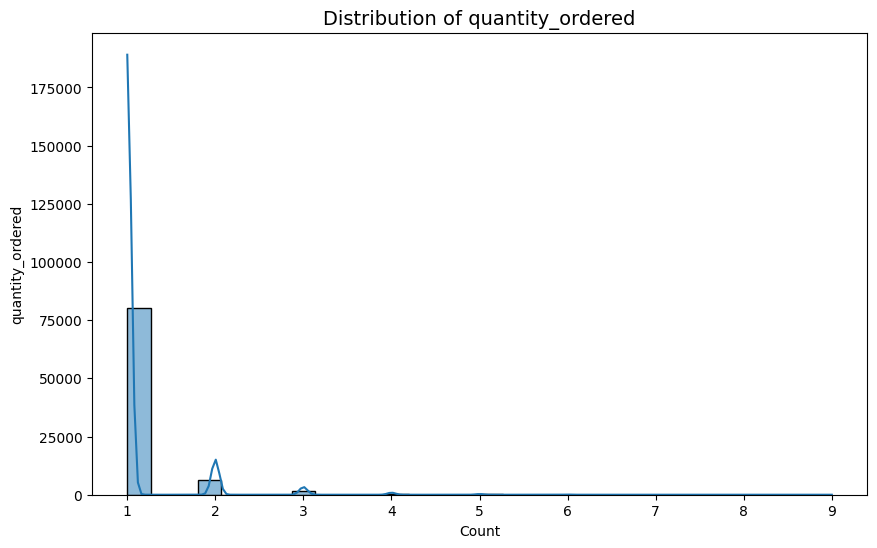

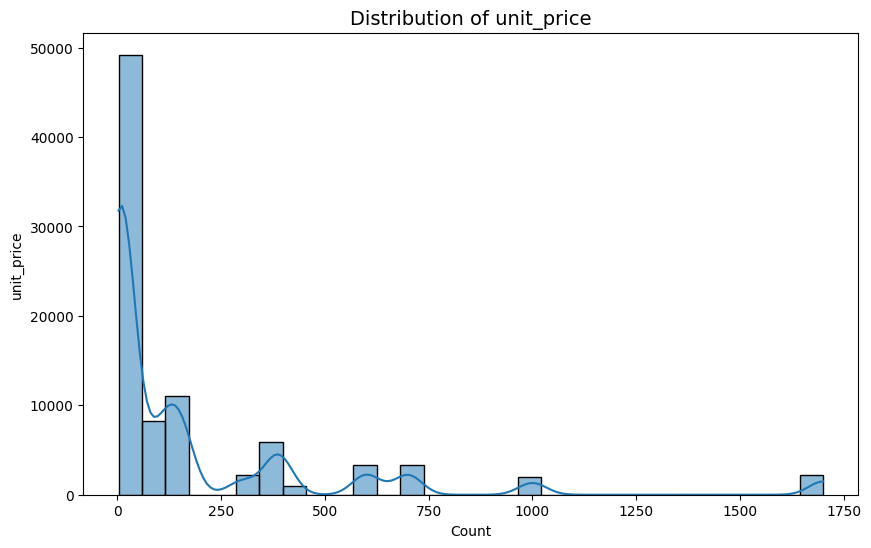

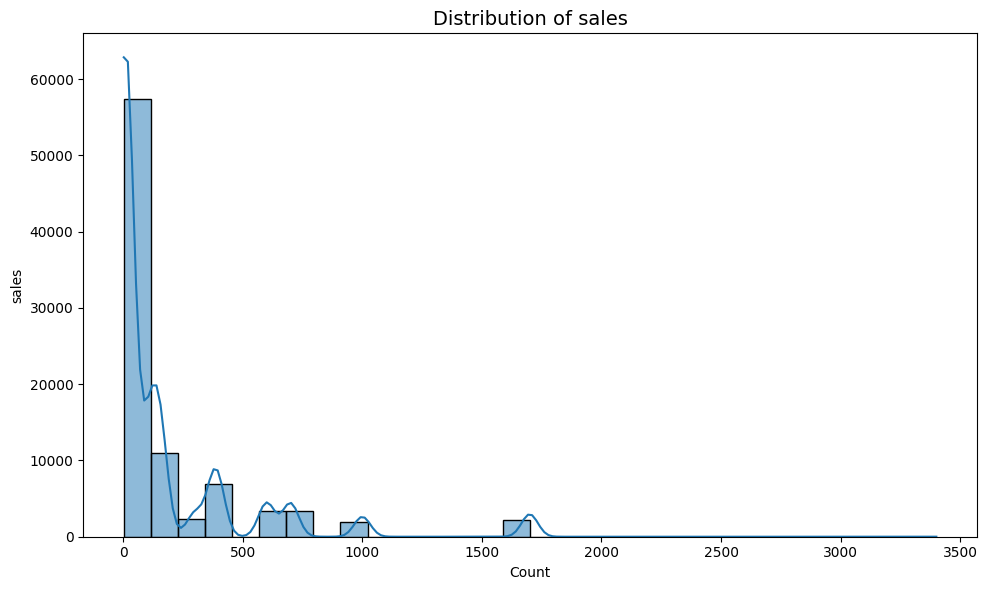

In [411]:
num_var = df1[['quantity_ordered','unit_price','sales']]

#user a for loop to iterate over the columns
for idx, col in enumerate(num_var):
    #set the size
    plt.figure(figsize=(10, 6))
    sns.histplot(df1[col].dropna(), bins=30, kde=True)
    #add titile to the graph
    plt.title(f'Distribution of {col}', fontsize=14)
    #add x and y labels
    plt.xlabel('Count')
    plt.ylabel(col)
    
plt.tight_layout()
#display the plot
plt.show()

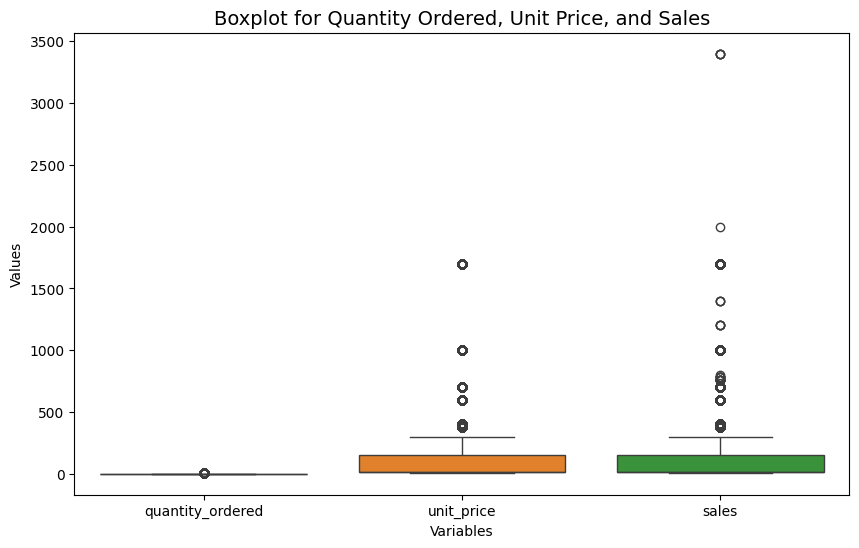

In [412]:

#plot a boxplot to check for outliers

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for all numerical variables on the same plot
sns.boxplot(data=num_var, orient='v')  # 'v' for vertical, 'h' for horizontal

# Add title and labels
plt.title('Boxplot for Quantity Ordered, Unit Price, and Sales', fontsize=14)
plt.xlabel('Variables')
plt.ylabel('Values')

# Display the plot
plt.show()



- **Categorical Variable**

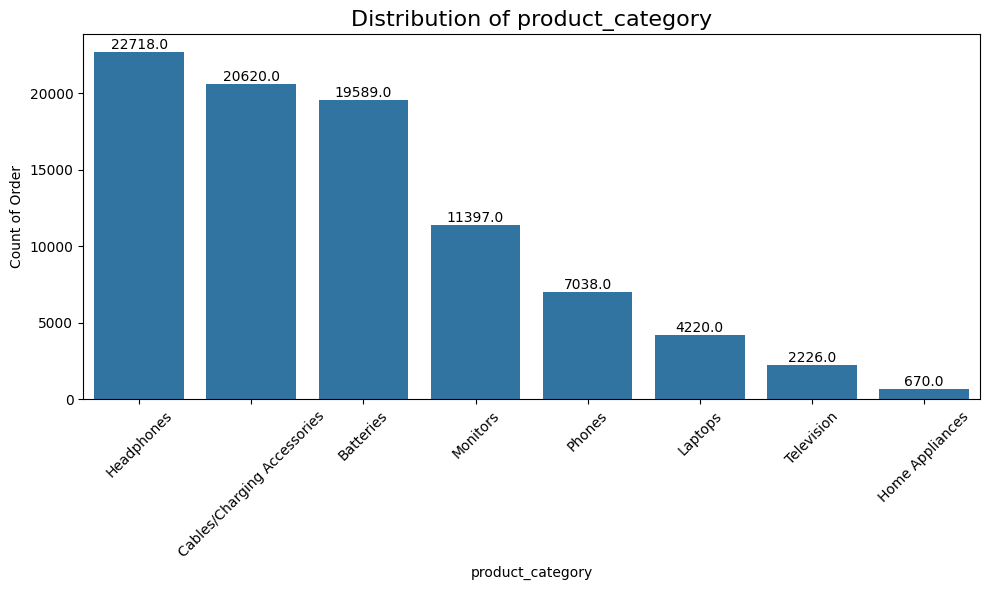

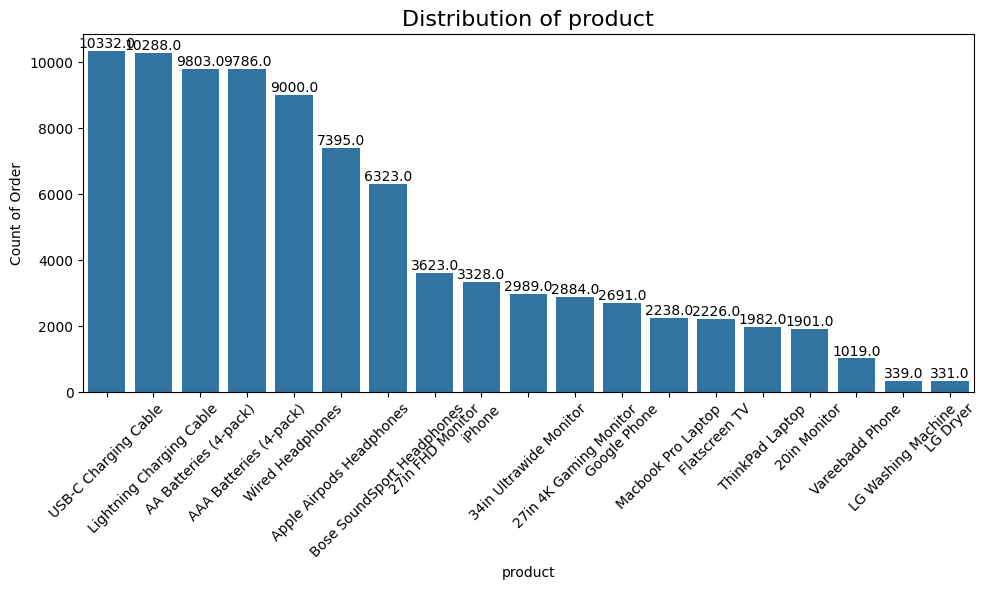

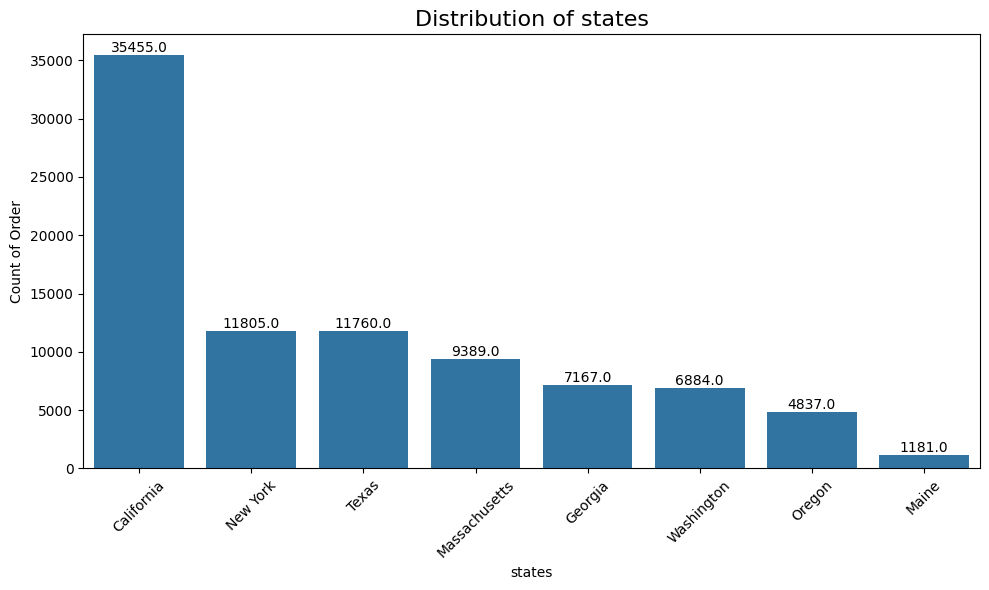

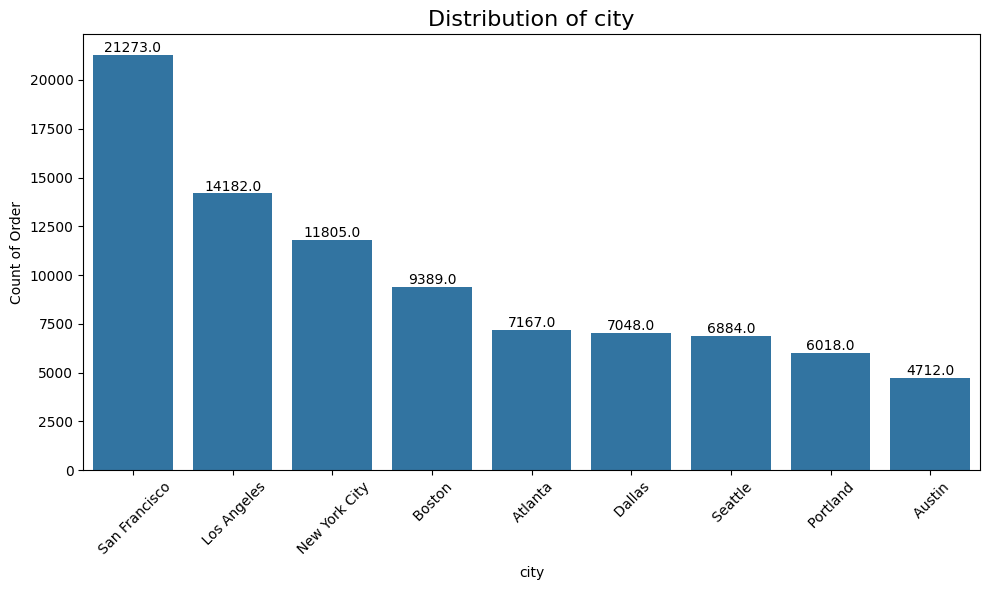

In [413]:

cat_var = df1[['product_category','product','states','city']]

#  Plot individual horizontal bar charts for each categorical variable, excluding nulls
for col in cat_var.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_var[col], order=cat_var[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.ylabel('Count of Order')
    plt.xlabel(col)
    plt.xticks(rotation = 45)
    
    # Add count labels on the bars
    ax = plt.gca()
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='center')

    plt.tight_layout()
    plt.show()

##### Bivariate Analysis

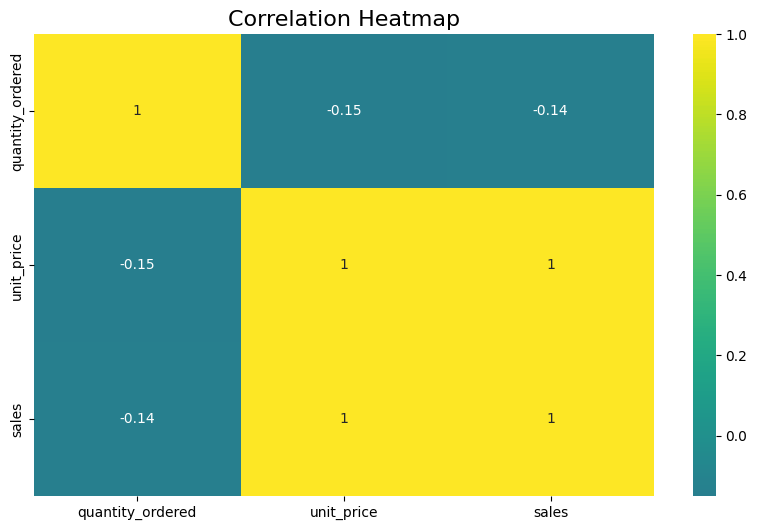

In [414]:
# List of numerical columns to analyze
num_cols = ['quantity_ordered', 'unit_price', 'sales']
# Calculate the correlation matrix
corr_matrix = df1[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', center=0)

# Add title
plt.title('Correlation Heatmap', fontsize=16)

# Display the plot
plt.show()


**Key Observations:**

The correlation is 1, showing a perfect positive correlation. This makes sense as sales could be calculated from unit_price, meaning sales directly depend on the unit_price. The formula for sales may be driving this perfect correlation.

- Both quantity_ordered has weak negative correlations with unit_price and sales, suggesting that increasing prices or quantities ordered don't have significant relationships with overall sales.
- The perfect correlation between unit_price and sales suggests that sales are either directly derived from or highly dependent on the unit price (e.g., sales = unit_price × quantity_ordered).The formula for sales may be driving this perfect correlation.
This heatmap helps identify which variables are closely related and may influence each other, guiding further analysis and decision-making.

 - **Order by Product and Product_Category**

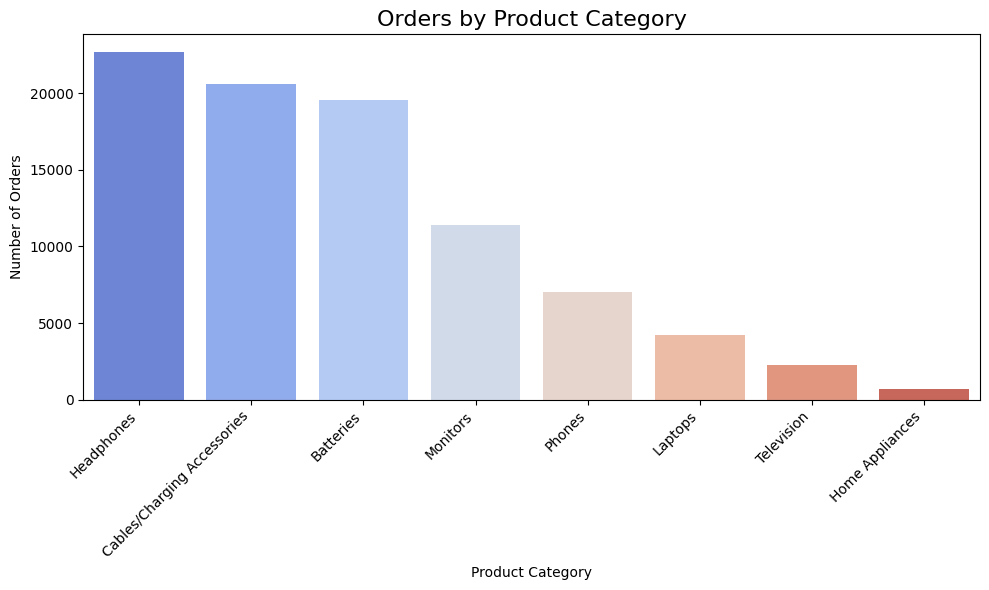

In [415]:
# Group by Product_Category to get the order count
category_order_counts = df1.groupby('product_category').size().reset_index(name='Order_Count')
# category_order_counts = df1.groupby('product_category')['order_id'].count().reset_index(name='Order_Count')

category_order_counts = category_order_counts.sort_values(by='Order_Count', ascending =False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a barplot for Orders by Product_Category
sns.barplot(x='product_category', y='Order_Count', 
            data=category_order_counts, palette ='coolwarm', 
            order=category_order_counts['product_category'])

# Add title and labels
plt.title('Orders by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

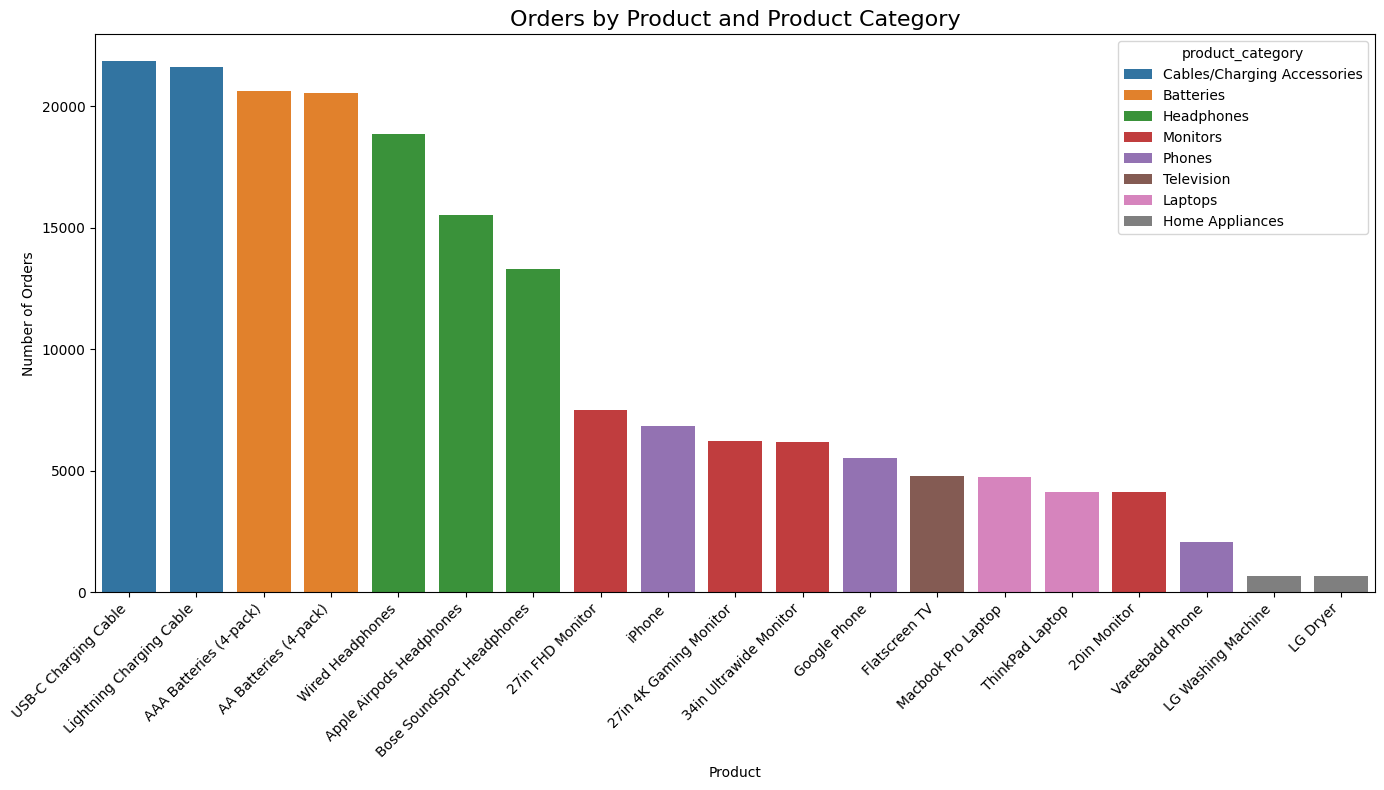

In [416]:
# Group by Product and Product_Category to get the order count
order_counts = df.groupby(['product', 'product_category']).size().reset_index(name='Order_Count')
order_counts = order_counts.sort_values(by='Order_Count', ascending =False)

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a barplot for Orders by Product and Product_Category
sns.barplot(x='product', y='Order_Count', hue='product_category',
             data=order_counts,
             order=order_counts['product'])

# Add title and labels
plt.title('Orders by Product and Product Category', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

- **Order by State**

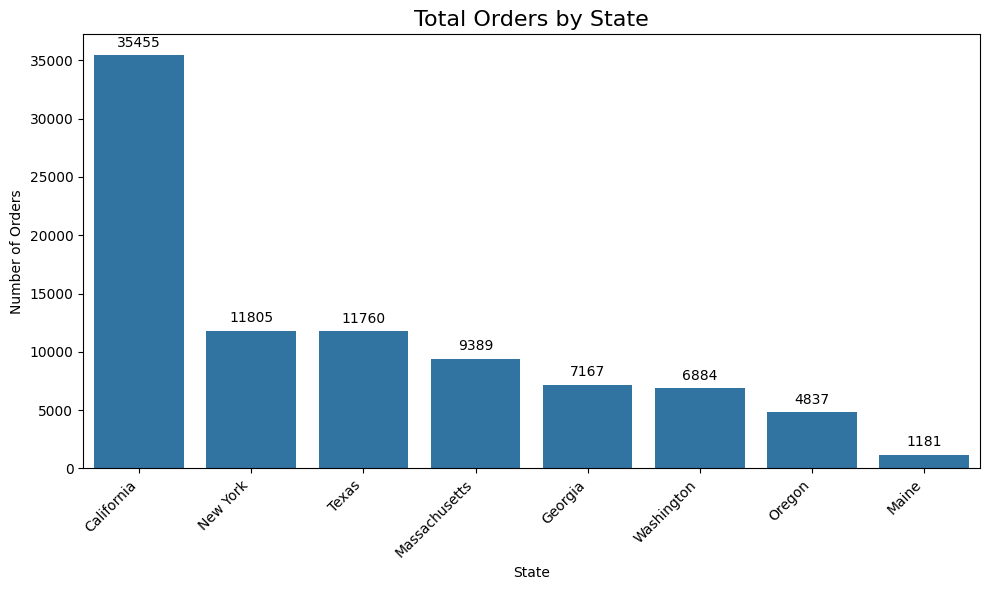

In [417]:

# Group by 'state' to get the count of orders for each state
state_order_counts = df1.groupby('states')['order_id'].count().reset_index(name='Order_Count')
state_order_counts = state_order_counts.sort_values(by='Order_Count', ascending = False)
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for Orders by State
bar_plot = sns.barplot(x='states', y='Order_Count', data=state_order_counts, order=state_order_counts['states'])

# Add title and labels
plt.title('Total Orders by State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),  # Format as an integer
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text in the center
                      ha='center', va='center', xytext=(0, 9),  # Offset the text slightly above the bar
                      textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


- **Order by City**

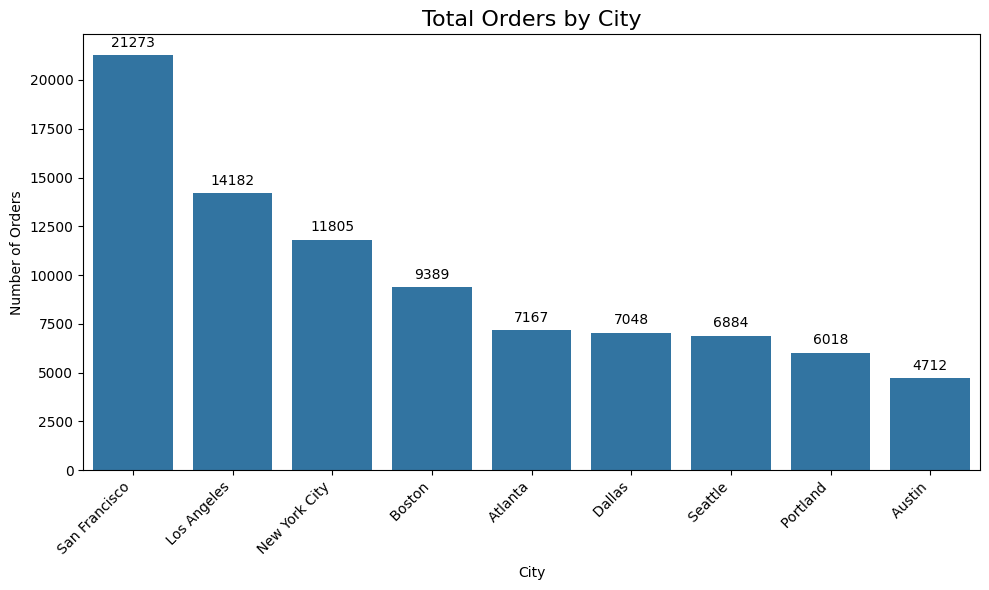

In [418]:

# Group by 'city' to get the count of orders for each city
city_order_counts = df1.groupby('city')['order_id'].count().reset_index(name='Order_Count')

city_order_counts =city_order_counts.sort_values(by='Order_Count', ascending = False)
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for Orders by State
bar_plot = sns.barplot(x='city', y='Order_Count', data=city_order_counts,
                       order= city_order_counts['city'])

# Add title and labels
plt.title('Total Orders by City', fontsize=16)
plt.xlabel('City')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),  # Format as an integer
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text in the center
                      ha='center', va='center', xytext=(0, 9),  # Offset the text slightly above the bar
                      textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


- **Sales by Product Category**

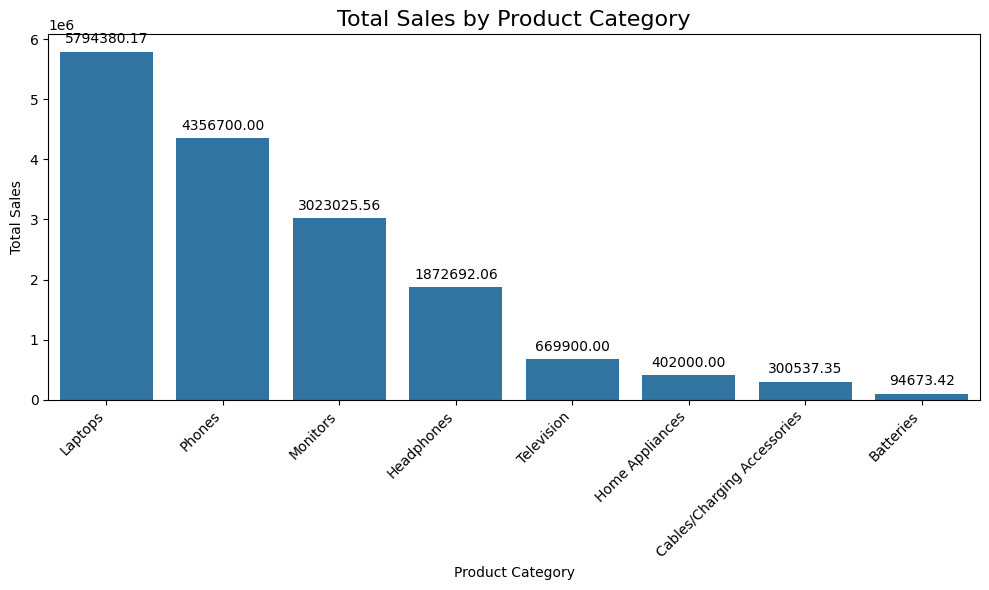

In [419]:

# Group by Product_Category to get the total sales for each category
category_sales = df1.groupby('product_category')['sales'].sum().reset_index()

# Sort the data by sales in descending order
category_sales= category_sales.sort_values(by='sales', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a barplot for Sales by Product_Category
bar_plot = sns.barplot(x='product_category', y='sales', data=category_sales,
                       order=category_sales['product_category'])

# Add title and labels
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),  # Format number with 2 decimal places
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # x and y position of text
                      ha='center', va='center', xytext=(0, 9),  # Offset the text slightly above the bar
                      textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


##### Multivariate Analysis

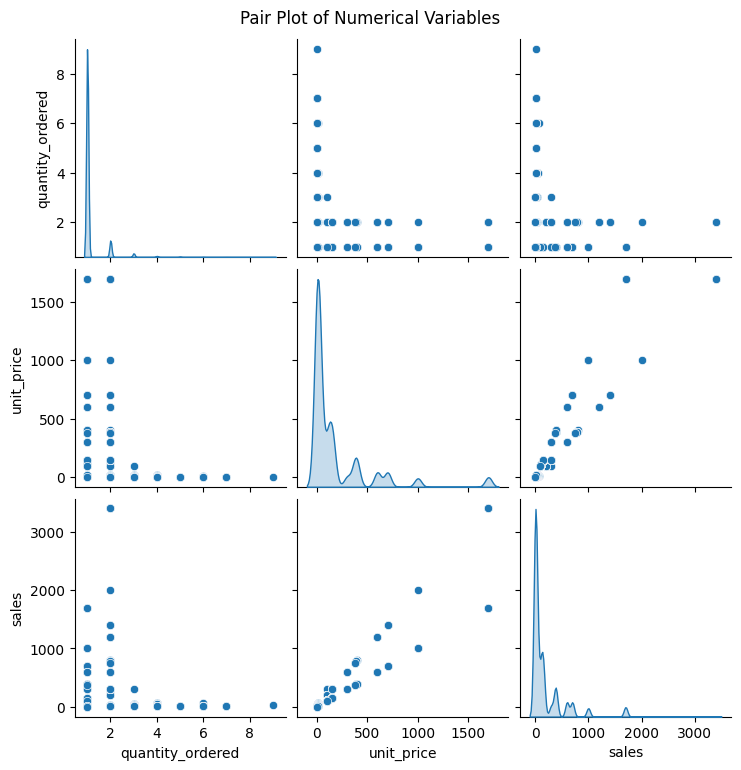

In [420]:

# List of numerical columns for pairplot
num_vars = ['quantity_ordered', 'unit_price', 'sales']

# Create pairplot
sns.pairplot(df1[num_vars], palette ='viridis', diag_kind='kde')

# Add title and show the plot
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


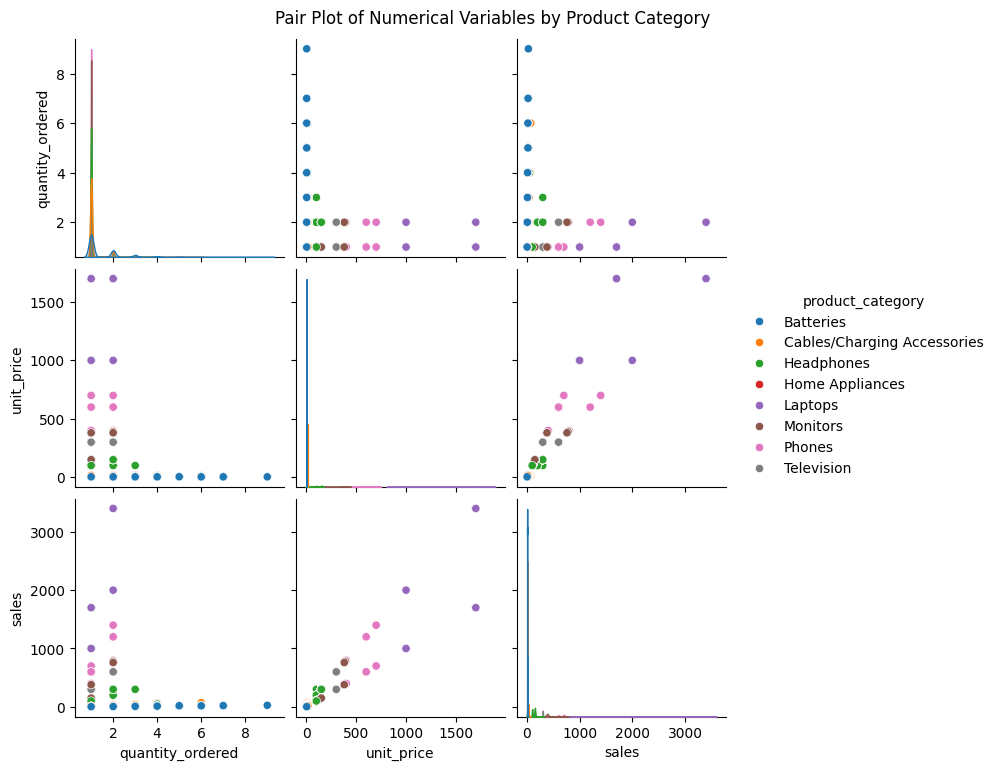

In [421]:
# Adding product_category as a hue in the pairplot
sns.pairplot(df1, hue='product_category', vars=num_vars, diag_kind='kde', height=2.5)

plt.suptitle('Pair Plot of Numerical Variables by Product Category', y=1.02)
plt.show()


##### Answering Analytical Questions

**Q1). How much money did we make this year?**

   month_name       sales
0     January  1812742.87
1    February  2200078.08
2       March  2804973.35
3       April  3389217.98
4         May  3150616.23
5        June  2576280.15
6        July    76764.50
7      August    73121.10
8   September    63822.47
9     October   117234.62
10   November   111324.54
11   December   137732.67
Total Sales for 2019: $16,513,908.56


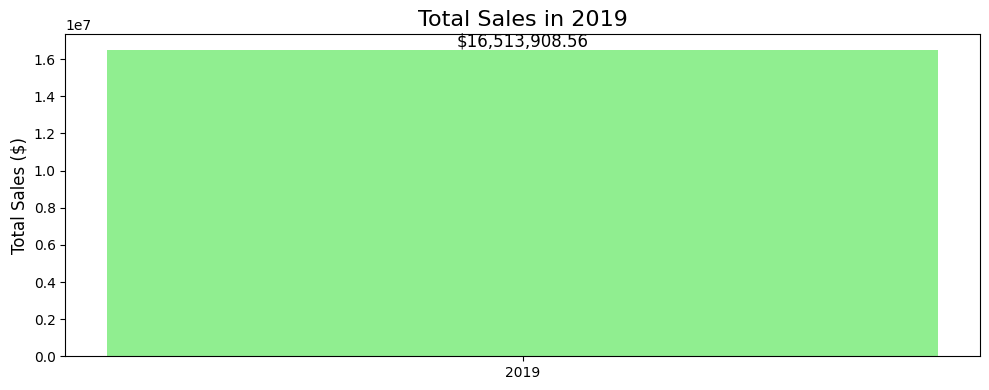

In [422]:
# Define the correct chronological order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month_name' to a categorical type with the specified order
df1['month_name'] = pd.Categorical(df1['month_name'], categories=month_order, ordered=True)


# Create a summary table (group by month or year if you have such a column)
sales_summary = df1.groupby('month_name')['sales'].sum().reset_index()

# Display the sales summary table
print(sales_summary)


# Calculate the total sales for the year 2019
total_sales_2019 = df1['sales'].sum()

# Print the total sales
print(f"Total Sales for 2019: ${total_sales_2019:,.2f}")



# Optional: Visualize the total sales as a simple bar chart
plt.figure(figsize=(10, 4))
plt.bar('2019', total_sales_2019, color='lightgreen')
plt.title('Total Sales in 2019', fontsize=16)
plt.ylabel('Total Sales ($)', fontsize=12)

# Display the total sales on the bar
for i in range(1):
    plt.text(i, total_sales_2019 + total_sales_2019 * 0.01, f"${total_sales_2019:,.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


**Q2). Can we identify any seasonality in the sales?** 

In [423]:

fig = px.line(df1, x=df1.index, y='sales', title='Sales Over Time', markers=True)
fig.update_layout(xaxis_title='Date', yaxis_title='Sales')
fig.show()


In [424]:

# Add a week column based on the date index
df1['week'] = df1.index.isocalendar().week

# Define the correct order for months and days
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'month_name' and 'day_name' to categorical types with the correct order
df1['month_name'] = pd.Categorical(df1['month_name'], categories=month_order, ordered=True)
df1['day_name'] = pd.Categorical(df1['day_name'], categories=day_order, ordered=True)



# Aggregate sales by year
sales_by_year = df1.groupby('year')['sales'].sum().reset_index()

# Aggregate sales by month
sales_by_month_name = df1.groupby('month_name')['sales'].sum().reset_index()

# Aggregate sales by week
sales_by_week = df1.groupby('week')['sales'].sum().reset_index()


# Aggregate sales by day
sales_by_day = df1.groupby('day_name')['sales'].sum().reset_index()


# Create subplots with 4 rows
fig = make_subplots(rows=4, cols=1, subplot_titles=('Total Sales by Year', 'Total Sales by Month', 'Total Sales by Week', 'Total Sales by Day'))

# Add Yearly Sales
fig.add_trace(go.Scatter(x=sales_by_year['year'], y=sales_by_year['sales'], mode='lines+markers', name='Yearly Sales'), row=1, col=1)

# Add Monthly Sales
fig.add_trace(go.Scatter(x=sales_by_month_name['month_name'].astype(str), y=sales_by_month_name['sales'], mode='lines+markers', name='Monthly Sales'), row=2, col=1)

#Add weekly sales
fig.add_trace(go.Scatter(x=sales_by_week['week'].astype(str), y=sales_by_week['sales'], mode='lines+markers', name='Weekly Sales'), row=3, col=1)

# Add Daily Sales
fig.add_trace(go.Scatter(x=sales_by_day['day_name'], y=sales_by_day['sales'], mode='lines+markers', name='Daily Sales'), row=4, col=1)

# Update layout
fig.update_layout(height=900, title_text='Sales Trends by Year, Month,Week and Day')
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_xaxes(title_text='Month', row=2, col=1)
fig.update_xaxes(title_text='Week', row=3, col=1)
fig.update_xaxes(title_text='Day', row=4, col=1)
fig.update_yaxes(title_text='Total Sales', row=1, col=1)
fig.update_yaxes(title_text='Total Sales', row=2, col=1)
fig.update_yaxes(title_text='Total Sales', row=3, col=1)
fig.update_yaxes(title_text='Total Sales', row=4, col=1)


fig.show()

- Seasonality is most apparent in the monthly sales data, where sales peak mid-year and drop dramatically in the second half of the year.This suggests there may be some cyclical or seasonal factors affecting sales during the middle of the year, potentially related to annual events or holidays.
- Weekly sales seem to follow a consistent pattern for the first 20 weeks, gradually increasing. Around week 26 to 27, there is a sharp decline. This could suggest that there is a mid-year slump in sales or a seasonal event causing the dip. After this dip, the weekly sales stabilize towards the end of the year. There is some potential weekly seasonality, but more data would be required to confirm this over multiple years.
- Daily sales do not seem to show a strong cyclical or seasonal pattern across the week. However, there’s a slight increase in sales mid-week (Tuesday to Thursday) and a small drop towards the weekend (Friday to Sunday). This could indicate higher sales during workdays, but the variation is not very large.
No strong seasonality is evident in daily sales.

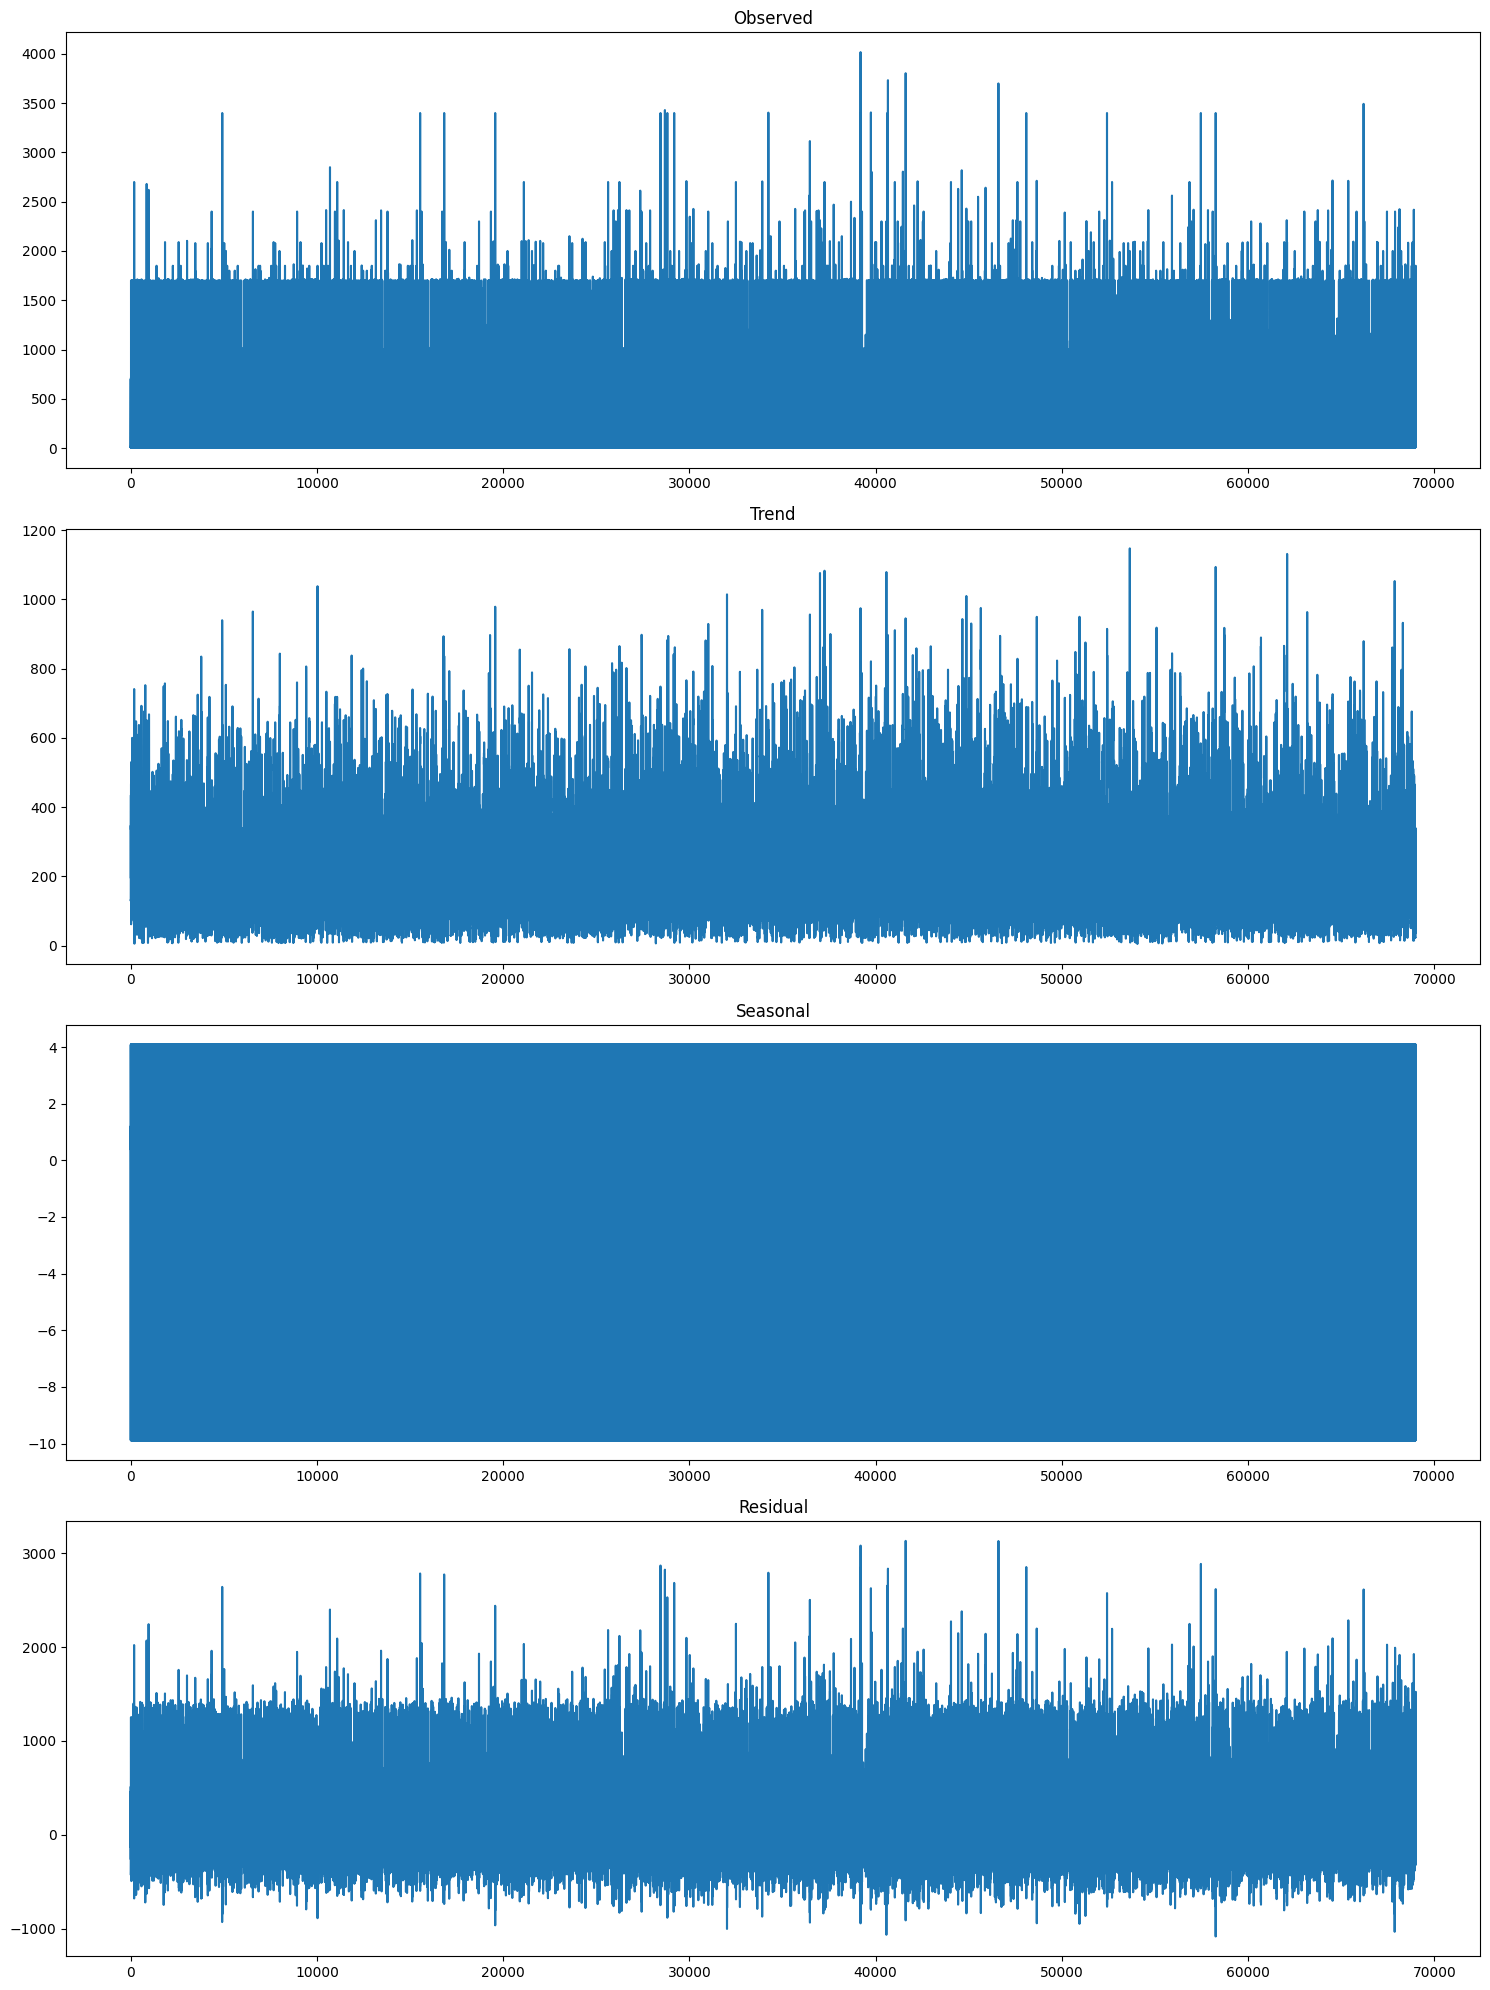

In [425]:

# Create a daily sales dataframe
daily_sales = df1.groupby(df1.index)['sales'].sum().reset_index()
# daily_sales.set_index('date', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(daily_sales['sales'], model='additive', period=7)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 20))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()


**Q3). What are our best and worst-selling products?**

In [426]:

# Aggregate total sales by product and product_category
product_sales = df1.groupby(['product'])['sales'].sum().reset_index()

# Sort products by total sales to find best and worst-selling products
best_selling_products = product_sales.sort_values(by='sales', ascending=False).head(5)
worst_selling_products = product_sales.sort_values(by='sales', ascending=True).head(5)  # Sort ascending for worst-selling



# Plot Best-Selling Products 
fig_best = px.bar(
    best_selling_products, 
    x='product', 
    y='sales', 
    title='Top 5 Best-Selling Products',
    labels={'sales': 'Total Sales', 'product': 'Product Name'},
    color_discrete_sequence=px.colors.qualitative.Set2  # Color scheme
)

# Annotate bars with sales figures for best-selling products
for i, row in best_selling_products.iterrows():
    fig_best.add_annotation(
        x=row['product'],
        y=row['sales'],
        text=f"${row['sales']:,.2f}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40
    )

# Update layout for better presentation
fig_best.update_layout(
    xaxis={'categoryorder': 'total descending'},
    height=500,
    xaxis_title='Product Name',
    yaxis_title='Total Sales',
)

fig_best.show()


# Plot Worst-Selling Products colored 
fig_worst = px.bar(
    worst_selling_products, 
    x='product', 
    y='sales', 
    title='Top 5 Worst-Selling Products',
    labels={'sales': 'Total Sales', 'product': 'Product Name'},
    color_discrete_sequence=px.colors.qualitative.Set1  # Different color scheme
)

# Annotate bars with sales figures
for i, row in worst_selling_products.iterrows():
    fig_worst.add_annotation(
        x=row['product'],
        y=row['sales'],
        text=f"${row['sales']:,.2f}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40
    )

# Update layout for better presentation
fig_worst.update_layout(
    xaxis={'categoryorder': 'total ascending'},  # Order categories ascending
    height=500,
    xaxis_title='Product Name',
    yaxis_title='Total Sales',
)

fig_worst.show()


**Q4). How do sales compare to previous months or weeks?** 

In [427]:
# Aggregate sales by month
sales_by_month_name = df1.groupby('month_name')['sales'].sum().reset_index()

# Aggregate sales by week
sales_by_week = df1.groupby('week')['sales'].sum().reset_index()

# Display the sales summary table
print(sales_by_month_name)
# Create subplots with 2 rows
fig = make_subplots(rows=2, cols=1, subplot_titles=('Total Sales by Month', 'Total Sales by Week'))

# Add Monthly Sales
fig.add_trace(go.Scatter(x=sales_by_month_name['month_name'].astype(str), y=sales_by_month_name['sales'], mode='lines+markers', name='Monthly Sales'), row=1, col=1)

#Add weekly sales
fig.add_trace(go.Scatter(x=sales_by_week['week'].astype(str), y=sales_by_week['sales'], mode='lines+markers', name='Weekly Sales'), row=2, col=1)

# Update layout
fig.update_layout(height=900, title_text='Sales Trends by  Month and Week')
fig.update_xaxes(title_text='Month', row=1, col=1)
fig.update_xaxes(title_text='Week', row=2, col=1)
fig.update_yaxes(title_text='Total Sales', row=1, col=1)
fig.update_yaxes(title_text='Total Sales', row=2, col=1)

fig.show()

   month_name       sales
0     January  1812742.87
1    February  2200078.08
2       March  2804973.35
3       April  3389217.98
4         May  3150616.23
5        June  2576280.15
6        July    76764.50
7      August    73121.10
8   September    63822.47
9     October   117234.62
10   November   111324.54
11   December   137732.67


**Q5). Which cities are our products delivered to most?**

Top Cities with the Most Deliveries:
             city  Total_Deliveries
7   San Francisco             20420
4     Los Angeles             13657
5   New York City             11313
2          Boston              8996
0         Atlanta              6850


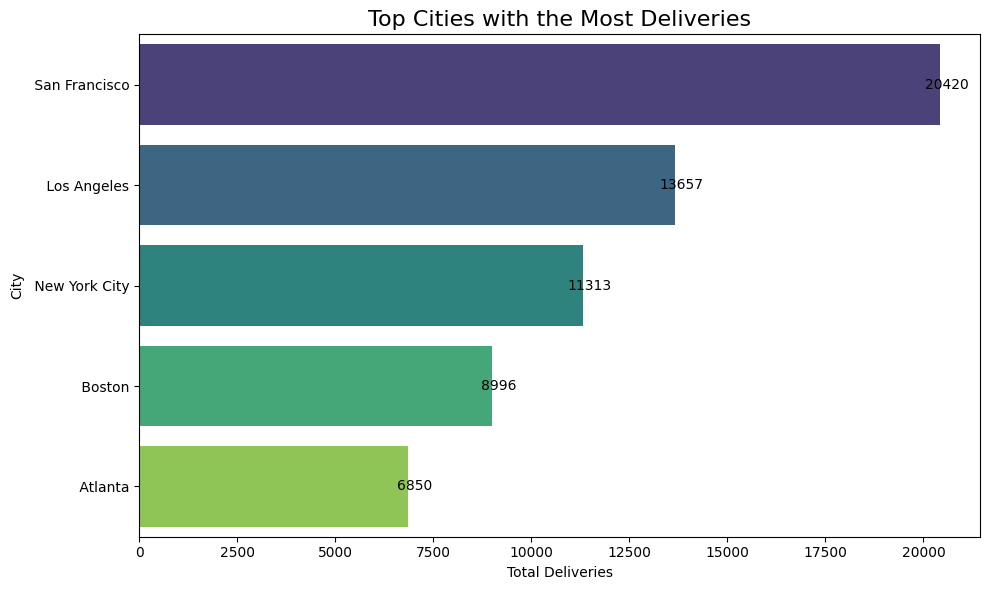

In [428]:

# Count the number of unique deliveries (using order_id or another unique identifier) by city
city_deliveries = df1.groupby('city')['order_id'].nunique().reset_index(name='Total_Deliveries')

# Sort the results in descending order and select top 5
city_deliveries = city_deliveries.sort_values(by='Total_Deliveries', ascending=False).head(5)


# Display the results
print("Top Cities with the Most Deliveries:")
print(city_deliveries)

# Visualization
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Total_Deliveries', y='city', data=city_deliveries, palette='viridis',
                       order = city_deliveries['city'])

# Add title and labels
plt.title('Top Cities with the Most Deliveries', fontsize=16)
plt.xlabel('Total Deliveries')
plt.ylabel('City')

# Annotate the bars
for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='center', va='center',
        xytext=(5, 0),
        textcoords='offset points', fontsize=10
    )

plt.tight_layout()
plt.show()



**Q6). How do product categories compare in revenue generated and quantities ordered?**

Product Category Summary:
              product_category  Total_Revenue  Total_Quantity_Ordered
4                      Laptops     5794380.17                  4225.0
6                       Phones     4356700.00                  7046.0
5                     Monitors     3023025.56                 11444.0
2                   Headphones     1872692.06                 23643.0
7                   Television      669900.00                  2233.0
3              Home Appliances      402000.00                   670.0
1  Cables/Charging Accessories      300537.35                 22373.0
0                    Batteries       94673.42                 27908.0


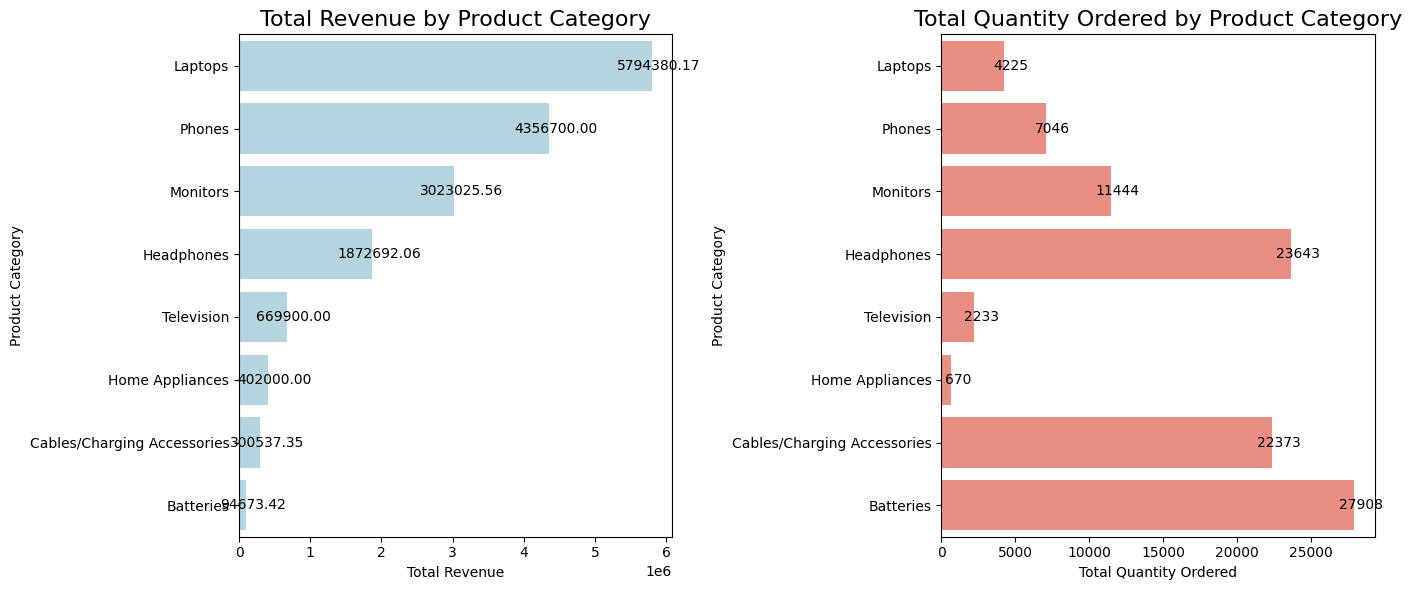

In [429]:

# Aggregate total revenue and quantities ordered by product category
category_summary = df1.groupby('product_category').agg(
    Total_Revenue=('sales', 'sum'),
    Total_Quantity_Ordered=('quantity_ordered', 'sum')
).reset_index()

# Sort by Total Revenue for better visualization
category_summary = category_summary.sort_values(by='Total_Revenue', ascending=False)

# Display the results
print("Product Category Summary:")
print(category_summary)

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot Total Revenue by product_category
sns.barplot(x='Total_Revenue', y='product_category', data=category_summary, ax=axes[0], 
            color='lightblue',order=category_summary['product_category'])
axes[0].set_title('Total Revenue by Product Category', fontsize=16)
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('Product Category')

# Annotate the bars for Total Revenue
for p in axes[0].patches:
    axes[0].annotate(
        format(p.get_width(), '.2f'),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='center', va='center',
        xytext=(5, 0),
        textcoords='offset points', fontsize=10
    )

# Plot Total Quantity Ordered by Product category
sns.barplot(x='Total_Quantity_Ordered', y='product_category', data=category_summary, ax=axes[1],
             color='salmon',order=category_summary['product_category'])
axes[1].set_title('Total Quantity Ordered by Product Category', fontsize=16)
axes[1].set_xlabel('Total Quantity Ordered')
axes[1].set_ylabel('Product Category')

# Annotate the bars for Total Quantity Ordered
for p in axes[1].patches:
    axes[1].annotate(
        format(p.get_width(), '.0f'),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='center', va='center',
        xytext=(5, 0),
        textcoords='offset points', fontsize=10
    )

# Adjust layout
plt.tight_layout()
plt.show()


**Product classification**

In [430]:
# Classify products into high-level and basic-level based on unit price
df1['product_level'] = df1['unit_price'].apply(lambda x: 'High-Level' if x > 99.99 else 'Basic-Level')

# Display the first few rows to verify the classification
print("Classification of Products into High-Level and Basic-Level:")
print(df1[['product', 'unit_price', 'product_level']].head())


Classification of Products into High-Level and Basic-Level:
                                      product  unit_price product_level
date                                                                   
2019-01-22 21:25:00                    iPhone      700.00    High-Level
2019-01-28 14:15:00  Lightning Charging Cable       14.95   Basic-Level
2019-01-17 13:33:00          Wired Headphones       11.99   Basic-Level
2019-01-05 20:33:00          27in FHD Monitor      149.99    High-Level
2019-01-25 11:59:00          Wired Headphones       11.99   Basic-Level


In [431]:
# Aggregate total revenue and quantities ordered by product level
level_summary = df1.groupby('product_level').agg(
    Total_Revenue=('sales', 'sum'),
    Total_Quantity_Ordered=('quantity_ordered', 'sum')
).reset_index()

# Sort by Total Revenue for better visualization
level_summary = level_summary.sort_values(by='Total_Revenue', ascending=False)

# Display the results
print("Product Level Summary:")
print(level_summary)


Product Level Summary:
  product_level  Total_Revenue  Total_Quantity_Ordered
1    High-Level    15363355.73                 33067.0
0   Basic-Level     1150552.83                 66475.0


Product Level Summary:
  product_level  Total_Revenue  Total_Quantity_Ordered  Revenue_Percentage  \
1    High-Level    15363355.73                 33067.0           93.032825   
0   Basic-Level     1150552.83                 66475.0            6.967175   

   Quantity_Percentage  
1            33.219144  
0            66.780856  


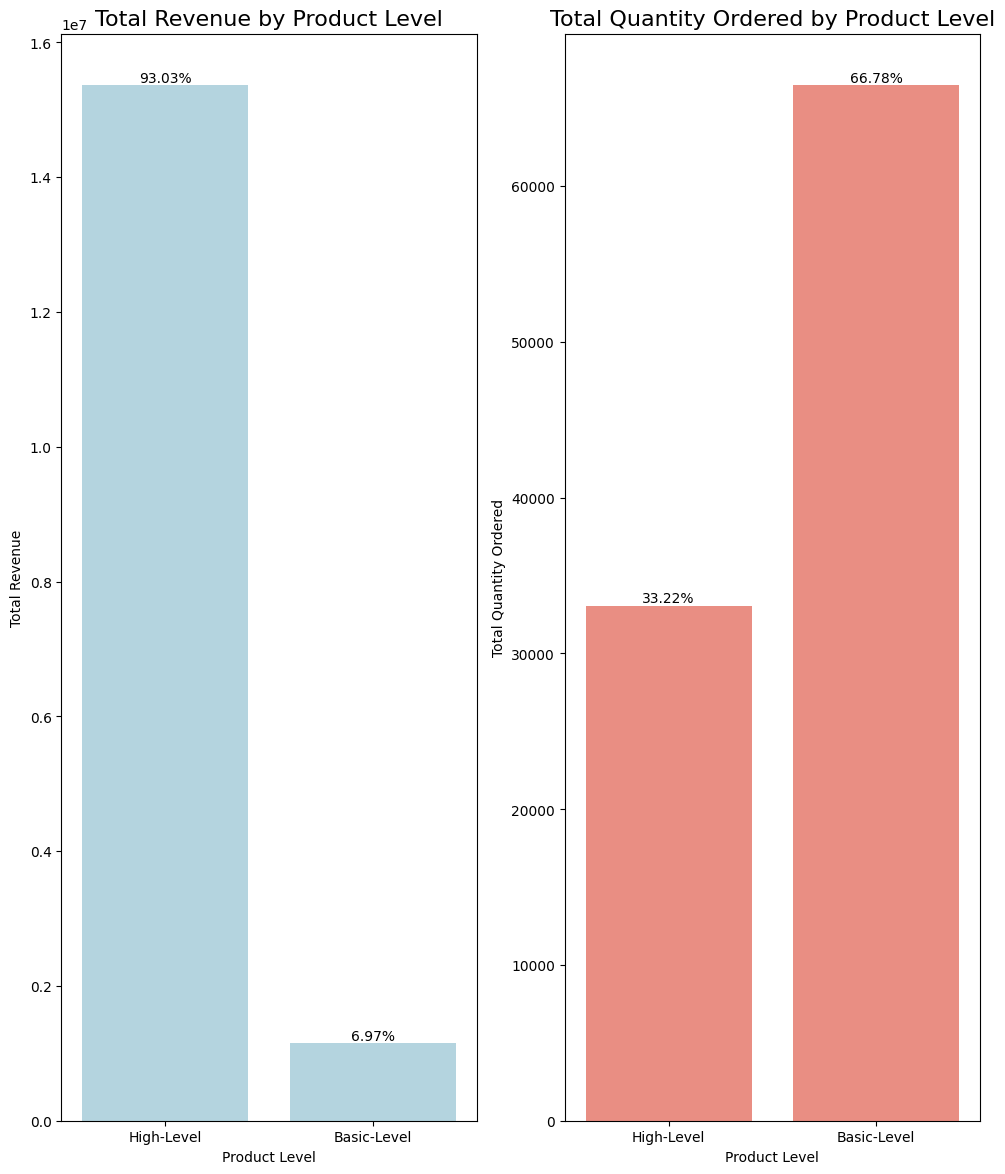

In [432]:
# Calculate percentages
total_revenue = level_summary['Total_Revenue'].sum()
total_quantity = level_summary['Total_Quantity_Ordered'].sum()

level_summary['Revenue_Percentage'] = (level_summary['Total_Revenue'] / total_revenue) * 100
level_summary['Quantity_Percentage'] = (level_summary['Total_Quantity_Ordered'] / total_quantity) * 100

# Sort by Total Revenue for better visualization
level_summary = level_summary.sort_values(by='Total_Revenue', ascending=False)

# Display the results
print("Product Level Summary:")
print(level_summary)

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 12))

# Plot Total Revenue by Product Level (Vertical)
sns.barplot(x='product_level', y='Total_Revenue', data=level_summary, ax=axes[0], color='lightblue')
axes[0].set_title('Total Revenue by Product Level', fontsize=16)
axes[0].set_xlabel('Product Level')
axes[0].set_ylabel('Total Revenue')

# Annotate the bars for Total Revenue with percentage
for p in axes[0].patches:
    axes[0].annotate(
        f"{(p.get_height()/total_revenue)*100:.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10
    )

# Plot Total Quantity Ordered by Product Level (Vertical)
sns.barplot(x='product_level', y='Total_Quantity_Ordered', data=level_summary, ax=axes[1], color='salmon')
axes[1].set_title('Total Quantity Ordered by Product Level', fontsize=16)
axes[1].set_xlabel('Product Level')
axes[1].set_ylabel('Total Quantity Ordered')

# Annotate the bars for Total Quantity Ordered with percentage
for p in axes[1].patches:
    axes[1].annotate(
        f"{(p.get_height()/total_quantity)*100:.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10
    )


# Adjust layout
plt.tight_layout()
plt.show()

**Key Insights**

- High-Level products(products with price above $99.9) account for 93.3% of company revenue despite representing only 33.22% of the total quantity sold while 6.97% of revenue is from basic-level products(products with price below $99.9) and  represents 66.78% of the total quantity sold

- High-Level products have a significantly higher average order value of $464.61 per unit.
Basic-Level products have a much lower average order value of $17.31 per unit.



In [433]:
#save cleaned data to csv file for visualization
df1.to_csv('getinnotized_sales_data.csv')

##### Hypothesis Testing

**Null Hypothesis (H0)**: There is no significant difference in average sales performance among the different months of the year.
**Alternate Hypothesis (H1)**: There is a significant difference in average sales performance among at least one pair of months.

In [434]:

# Group sales data by month
monthly_sales = df1.groupby('month_name')['sales'].apply(list)

# Perform ANOVA
f_statistic, p_value = f_oneway(*monthly_sales)

# Display the results
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

# Define significance level
alpha = 0.05

# Check the results against the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales performance across months.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales performance across months.")


F-Statistic: 1.2767967473682968
P-Value: 0.23054836110563923
Fail to reject the null hypothesis: There is no significant difference in sales performance across months.


- The result suggests that there is no statistically significant difference in sales performance across different months. In simpler terms, the variations in sales performance from month to month could be due to random fluctuations rather than any systematic monthly trend.This outcome implies that monthly sales do not vary in a way that suggests any specific month is performing significantly better or worse than others in a statistically meaningful way over the period analyzed.


##### **Recommendations:**

- Given that High-Level products generate over 93% of revenue, prioritize marketing, inventory management, and customer service for these items.Invest in expanding the range of High-Level products to capitalize on their high revenue generation potential.

- While Basic-Level products don't contribute significantly to revenue, they play a role in attracting customers and potentially leading to High-Level purchases.Optimize the Basic-Level product line to ensure profitability and use them as entry points for customer acquisition.

- Develop strategies to upsell customers from Basic-Level to High-Level products.Create bundles that combine High-Level and Basic-Level products to increase overall order values.

- On ineventory management, Client should carefully manage inventory of High-Level products to ensure availability, as they are crucial for revenue.For Basic-Level products, focus on efficient stock management to minimize holding costs while maintaining availability.
Customer Segmentation:

- Analyze customer behavior to identify segments that prefer High-Level vs Basic-Level products.
Tailor marketing and sales approaches for these different customer segments.
Pricing Strategy:

- Allocate a larger portion of the marketing budget to High-Level products, given their outsized impact on revenue.
For Basic-Level products, focus marketing efforts on volume sales and their potential to lead customers towards High-Level products.
- Analyze if there are seasonal trends in the sales of High-Level vs Basic-Level products and adjust marketing and inventory strategies accordingly.
By leveraging these insights and implementing these recommendations, the company can optimize its product mix, marketing strategies, and overall business approach to maximize revenue while maintaining a balanced product offering that caters to different customer segments and price points.